#  step-  1 probelam statement :
   

In [1]:
import pandas as pd
import numpy as np

### for visualization
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, multilabel_confusion_matrix, classification_report
import matplotlib.animation as animation

# step - 2 Data Gathering

In [2]:
df = pd.read_csv(r'C:\Users\rocky\OneDrive\Desktop\Data Science work\machine learing\creditcard.csv')

In [3]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


# step- 3  EDA

In [4]:
df.shape

(284807, 31)

In [5]:
df.size

8829017

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [9]:
df.isna()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284803,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284804,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284805,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [10]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [11]:
df.axes

[RangeIndex(start=0, stop=284807, step=1),
 Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
        'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
        'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
        'Class'],
       dtype='object')]

In [12]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

C:\ProgramData\anaconda3\ram\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Time'>

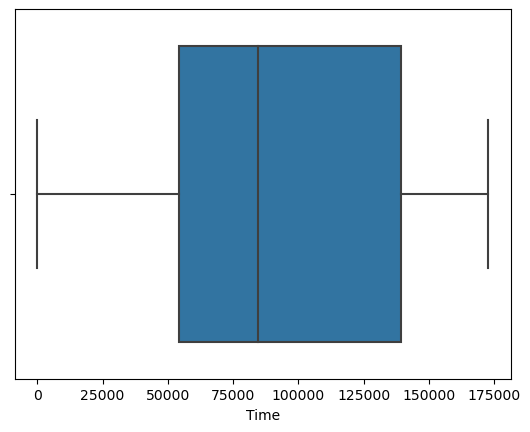

In [13]:
sns.boxplot(df['Time'])

C:\ProgramData\anaconda3\ram\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='V1'>

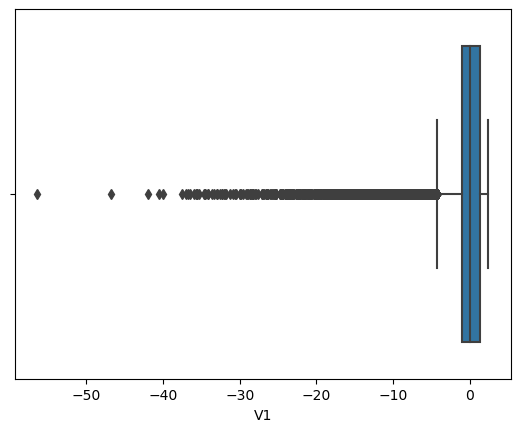

In [14]:

sns.boxplot(df['V1'])

In [15]:
q1 = df['V1'].quantile(0.25)
q2 = df['V1'].quantile(0.50)
q3 = df['V1'].quantile(0.75)


In [16]:
iqr = q3 - q1

In [17]:
iqr

2.236015078268187

In [18]:
lower_tail = q1 - 1.5*iqr

In [19]:
lower_tail

-4.274396001792603

In [20]:
upper_tail = q3 + 1.5*iqr

In [21]:
upper_tail

4.669664311280146

In [22]:

outliers = df[(df['V1']<lower_tail) | (df['V1']>upper_tail)]

In [23]:
outliers

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
18,14.0,-5.401258,-5.450148,1.186305,1.736239,3.049106,-1.763406,-1.559738,0.160842,1.233090,...,-0.503600,0.984460,2.458589,0.042119,-0.481631,-0.621272,0.392053,0.949594,46.80,0
85,55.0,-4.575093,-4.429184,3.402585,0.903915,3.002224,-0.491078,-2.705393,0.666451,1.922216,...,-0.047365,0.853360,-0.971600,-0.114862,0.408300,-0.304576,0.547785,-0.456297,200.01,0
140,87.0,-5.101877,1.897022,-3.458034,-1.277543,-5.517758,2.098366,3.329603,1.250966,0.271501,...,-0.871744,-0.678879,-0.555900,-0.761660,0.066611,0.767227,0.731634,-0.860310,919.60,0
146,92.0,-5.285971,4.847323,-1.290368,-1.427842,-0.621533,-0.604691,0.437866,0.336384,3.558373,...,-0.923604,-1.171187,0.150872,-0.493322,1.050554,0.194865,2.490503,1.575380,8.95,0
164,103.0,-6.093248,-12.114213,-5.694973,3.294389,-1.413792,4.776000,4.808426,-0.228197,-0.525896,...,2.228823,-2.264037,-3.553381,1.215279,-0.406073,-0.653384,-0.711222,0.672900,3828.04,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284631,172623.0,-5.459612,4.844512,-5.127471,-0.772816,-2.098147,0.010068,-2.943210,4.723736,0.030501,...,-0.104680,-0.823664,0.766333,-0.498784,0.022025,0.271928,-0.032666,-0.021239,9.82,0
284649,172642.0,-11.946976,9.772660,-8.006237,-2.498596,-4.229520,-1.320039,-3.259766,5.059956,4.870093,...,-0.957977,-1.529035,0.838689,-1.249172,1.714495,0.314623,2.112848,1.234408,10.74,0
284772,172760.0,-6.713826,2.369104,-3.534768,-0.368259,-1.721030,-1.322808,-0.190876,0.891149,2.068476,...,0.131247,0.994246,-0.002140,-0.072979,-0.167159,-0.387271,-2.616341,0.474584,19.59,0
284795,172778.0,-12.516732,10.187818,-8.476671,-2.510473,-4.586669,-1.394465,-3.632516,5.498583,4.893089,...,-0.944759,-1.565026,0.890675,-1.253276,1.786717,0.320763,2.090712,1.232864,9.87,0


C:\ProgramData\anaconda3\ram\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='V1'>

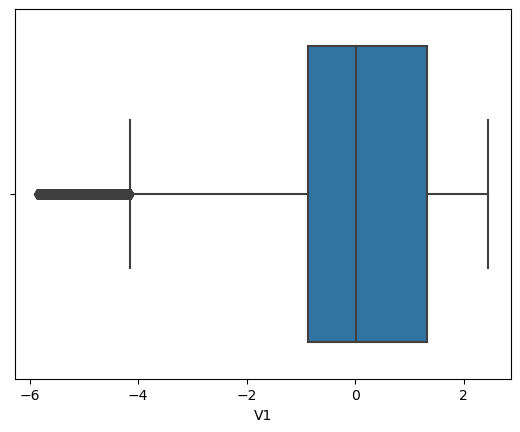

In [24]:
V1_median = df['V1'].median()
# Define a threshold for outliers (for example, anything more than 3 standard deviations from the median)
outlier_threshold = 3 * df['V1'].std()
                                                                                                   #handling outliers 
# Replace outliers with the median
df['V1'] = df['V1'].apply(lambda x: V1_median if abs(x - V1_median) > outlier_threshold else x)

sns.boxplot(df['V1'])


<AxesSubplot:xlabel='V1', ylabel='Density'>

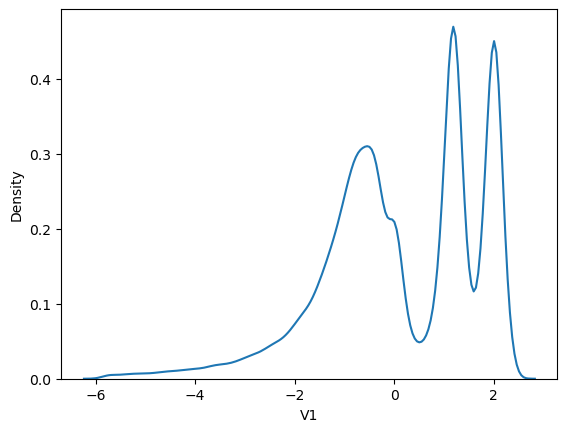

In [25]:
sns.kdeplot(df['V1'])

C:\ProgramData\anaconda3\ram\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='V2'>

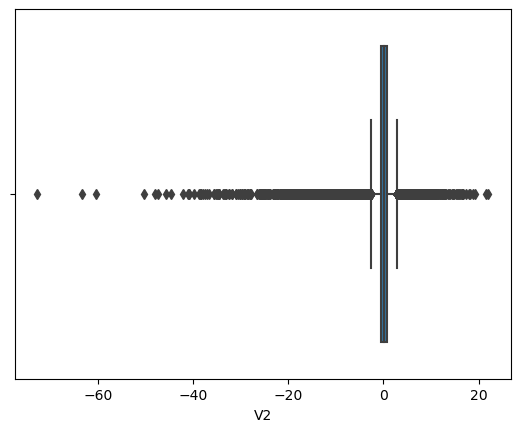

In [26]:
sns.boxplot(df['V2'])

In [27]:
q1 = df['V2'].quantile(0.25)
q2 = df['V2'].quantile(0.50)
q3 = df['V2'].quantile(0.75)

In [28]:
iqr = q3 - q1
iqr

1.4022737847050104

In [29]:
lower_tail = q1 - 1.5*iqr

In [30]:
lower_tail

-2.7019605905224315

In [31]:
upper_tail = q3 + 1.5 * iqr

In [32]:
 outliers = df[(df['V2']<lower_tail) | (df['V2']>upper_tail)]

In [33]:
outliers

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
18,14.0,-5.401258,-5.450148,1.186305,1.736239,3.049106,-1.763406,-1.559738,0.160842,1.233090,...,-0.503600,0.984460,2.458589,0.042119,-0.481631,-0.621272,0.392053,0.949594,46.80,0
85,55.0,-4.575093,-4.429184,3.402585,0.903915,3.002224,-0.491078,-2.705393,0.666451,1.922216,...,-0.047365,0.853360,-0.971600,-0.114862,0.408300,-0.304576,0.547785,-0.456297,200.01,0
89,59.0,-0.773293,-4.146007,-0.932038,0.027094,-1.698307,0.460188,0.737344,-0.314216,-0.842673,...,0.890978,0.026123,-1.134769,-0.654958,0.098386,-0.209150,-0.171709,0.208057,1142.02,0
146,92.0,-5.285971,4.847323,-1.290368,-1.427842,-0.621533,-0.604691,0.437866,0.336384,3.558373,...,-0.923604,-1.171187,0.150872,-0.493322,1.050554,0.194865,2.490503,1.575380,8.95,0
164,103.0,0.018109,-12.114213,-5.694973,3.294389,-1.413792,4.776000,4.808426,-0.228197,-0.525896,...,2.228823,-2.264037,-3.553381,1.215279,-0.406073,-0.653384,-0.711222,0.672900,3828.04,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284727,172716.0,-3.240505,-2.799345,1.749777,0.332355,1.535180,-0.574599,-2.131128,1.034499,0.110722,...,0.553838,0.351755,-0.380236,-0.941868,0.232699,0.901126,-0.030580,-0.501609,52.00,0
284728,172717.0,-2.969250,3.216851,-2.873002,-0.628840,-1.009366,-1.239406,-0.868517,2.095139,0.298903,...,-0.314385,-1.050903,0.387902,0.598871,-0.020316,0.146919,0.232856,0.122176,9.99,0
284732,172721.0,1.076175,-3.116353,-2.051439,-0.953189,-1.544838,-1.124645,0.385570,-0.698014,-1.829401,...,0.104853,-0.598243,-0.343164,0.088299,-0.267658,-0.313651,-0.132091,0.056029,664.60,0
284795,172778.0,0.018109,10.187818,-8.476671,-2.510473,-4.586669,-1.394465,-3.632516,5.498583,4.893089,...,-0.944759,-1.565026,0.890675,-1.253276,1.786717,0.320763,2.090712,1.232864,9.87,0


C:\ProgramData\anaconda3\ram\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='V2'>

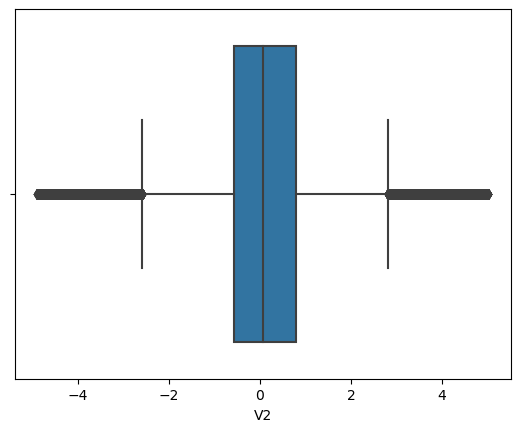

In [34]:
V1_median = df['V2'].median()
# Define a threshold for outliers (for example, anything more than 3 standard deviations from the median)
outlier_threshold = 3 * df['V2'].std()
                                                                                                   #handling outliers 
# Replace outliers with the median
df['V2'] = df['V2'].apply(lambda x: V1_median if abs(x - V1_median) > outlier_threshold else x)

sns.boxplot(df['V2'])

<AxesSubplot:xlabel='V2', ylabel='Count'>

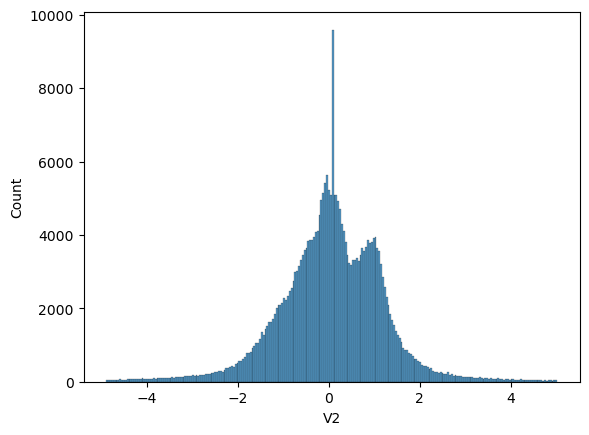

In [35]:
sns.histplot(df['V2'])          ### visual the V2 histoplot 

C:\ProgramData\anaconda3\ram\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='V3'>

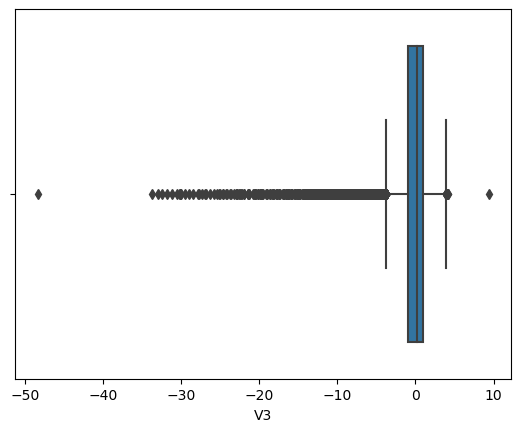

In [36]:
sns.boxplot(df['V3'])

In [37]:
q1 = df['V3'].quantile(0.25)
q2 = df['V3'].quantile(0.50)
q3 = df['V3'].quantile(0.75)

In [38]:
iqr = q3 - q1
iqr

1.9175603806206956

In [39]:
lower_tail = q1 - 1.5*iqr

In [40]:
lower_tail

-3.7667054090861836

In [41]:
upper_tail = q3 + 1.5 * iqr
upper_tail

3.9035361133965982

In [42]:
outliers = df[(df['V3']<lower_tail) | (df['V3']>upper_tail)]
outliers

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
164,103.0,0.018109,0.065486,-5.694973,3.294389,-1.413792,4.776000,4.808426,-0.228197,-0.525896,...,2.228823,-2.264037,-3.553381,1.215279,-0.406073,-0.653384,-0.711222,0.672900,3828.04,0
958,725.0,-0.534913,0.550684,4.017561,3.254904,-0.919559,1.644716,-0.638287,0.432396,0.000158,...,0.147772,1.096225,-0.416073,0.628186,0.106290,0.474381,0.019260,-0.126126,0.76,0
1632,1264.0,0.018109,0.065486,-12.389545,6.013346,-32.092129,21.393069,34.303177,-7.520784,-1.925732,...,-4.709977,1.366110,-2.925888,0.843551,0.746267,0.801387,3.852046,4.157934,7712.43,0
4023,3663.0,-1.412929,1.081831,4.101716,3.125893,-0.737106,1.689131,-0.294576,-0.251492,2.861628,...,-0.267638,0.771383,-0.457158,0.522547,0.136126,0.346932,-0.379387,-0.507720,2.66,0
5257,5093.0,-4.914605,0.065486,-4.075931,0.497255,-0.042376,-1.889240,0.743810,-0.049906,5.697423,...,-1.142075,-0.474004,0.366429,-0.094575,0.487756,-0.547307,0.838527,-0.637126,0.89,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284610,172602.0,-3.849825,3.978385,-5.138427,-0.756156,-1.496193,-1.344611,-1.733808,3.273432,-0.870490,...,0.601646,0.576961,0.213363,0.046459,0.381029,-0.417428,-1.409201,-0.350954,11.76,0
284631,172623.0,-5.459612,4.844512,-5.127471,-0.772816,-2.098147,0.010068,-2.943210,4.723736,0.030501,...,-0.104680,-0.823664,0.766333,-0.498784,0.022025,0.271928,-0.032666,-0.021239,9.82,0
284649,172642.0,0.018109,0.065486,-8.006237,-2.498596,-4.229520,-1.320039,-3.259766,5.059956,4.870093,...,-0.957977,-1.529035,0.838689,-1.249172,1.714495,0.314623,2.112848,1.234408,10.74,0
284795,172778.0,0.018109,0.065486,-8.476671,-2.510473,-4.586669,-1.394465,-3.632516,5.498583,4.893089,...,-0.944759,-1.565026,0.890675,-1.253276,1.786717,0.320763,2.090712,1.232864,9.87,0


C:\ProgramData\anaconda3\ram\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='V3'>

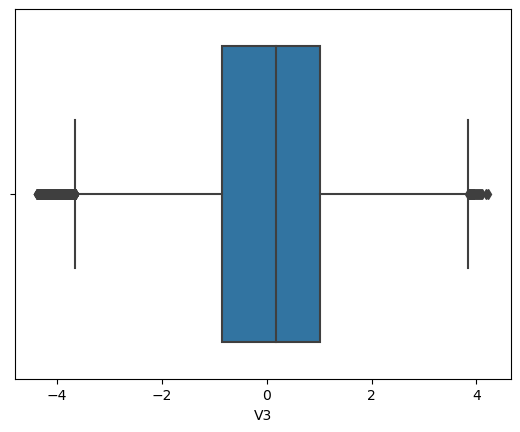

In [43]:
V1_median = df['V3'].median()
# Define a threshold for outliers (for example, anything more than 3 standard deviations from the median)
outlier_threshold = 3 * df['V3'].std()
                                                                                                   #handling outliers 
# Replace outliers with the median
df['V3'] = df['V3'].apply(lambda x: V1_median if abs(x - V1_median) > outlier_threshold else x)

sns.boxplot(df['V3'])

C:\ProgramData\anaconda3\ram\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='V3', ylabel='Density'>

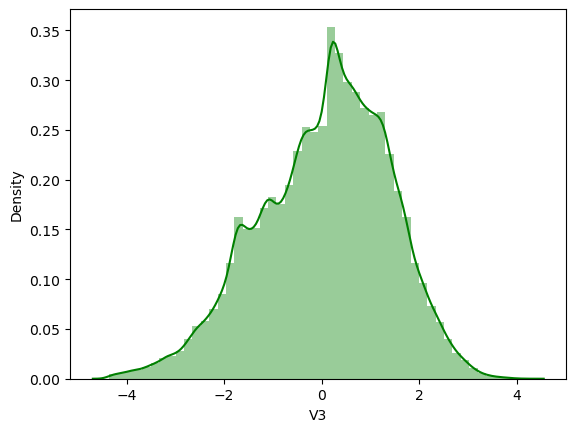

In [44]:
sns.distplot(df['V3'], kde = True, color = "g")  ##### visualize the v3 by using distplot

C:\ProgramData\anaconda3\ram\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='V4'>

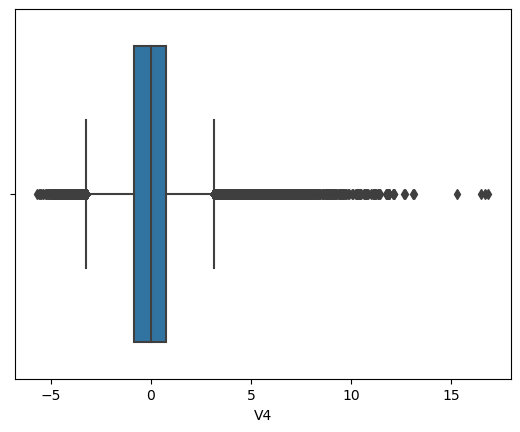

In [45]:
sns.boxplot(df['V4'])

In [46]:
q1 = df['V4'].quantile(0.25)
q2 = df['V4'].quantile(0.50)
q3 = df['V4'].quantile(0.75)

In [47]:
iqr = q3 - q1
iqr

1.5919814057998605

In [48]:
lower_tail = q1 - 1.5*iqr

In [49]:
lower_tail

-3.236612225031064

In [50]:
upper_tail = q3 + 1.5 * iqr
upper_tail

3.1313133981683787

In [51]:
outliers = df[(df['V4']<lower_tail) | (df['V4']>upper_tail)]
outliers

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
51,36.0,-1.004929,-0.985978,-0.038039,3.710061,-6.631951,5.122103,4.371691,-2.006868,-0.278736,...,1.393406,-0.381671,0.969719,0.019445,0.570923,0.333278,0.857373,-0.075538,1402.95,0
83,53.0,-1.198968,-1.474100,1.840326,-4.515824,0.327567,-0.174469,0.959726,-1.026456,1.700435,...,-0.453169,0.334614,-0.364541,-0.310186,-0.302599,-1.243924,-1.123457,-0.734351,89.17,0
98,67.0,-1.494668,0.837241,2.628211,3.145414,-0.609098,0.258495,-0.012189,0.102136,-0.286164,...,-0.140047,0.355044,0.332720,0.718193,-0.219366,0.118927,-0.317486,-0.340783,28.28,0
116,75.0,-1.439069,0.267631,3.562770,3.481486,-1.160101,1.764781,-0.558817,0.442019,0.348431,...,0.129257,1.129282,-0.006978,0.497337,0.130515,0.525668,-0.088950,0.113206,81.13,0
164,103.0,0.018109,0.065486,0.179846,3.294389,-1.413792,4.776000,4.808426,-0.228197,-0.525896,...,2.228823,-2.264037,-3.553381,1.215279,-0.406073,-0.653384,-0.711222,0.672900,3828.04,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284745,172734.0,1.763157,-0.103980,0.199911,3.948933,-0.642361,0.257215,-0.679898,0.291004,0.187648,...,0.172698,0.372182,0.189281,-0.115979,-0.370147,0.036638,-0.008578,-0.029708,52.34,0
284746,172735.0,-0.899559,-0.047744,0.717555,-3.262816,-0.384415,-0.164529,-0.227184,0.272726,-1.835745,...,-0.289810,-0.464731,-0.434248,0.009776,0.803066,-0.129513,-0.176856,-0.190917,10.00,0
284758,172745.0,1.911377,1.220896,-1.665127,4.148798,1.029442,-0.727610,0.500745,-0.198614,-1.140565,...,-0.429116,-1.184198,0.288661,-0.418323,-0.222729,-0.335830,-0.001158,0.017556,6.75,0
284774,172762.0,-0.725459,0.194981,-1.785571,-3.779860,2.177420,2.975713,-0.239695,0.912303,-3.159994,...,0.046103,0.102480,-0.461027,0.717647,1.253036,0.207138,-0.630549,-0.163911,7.00,0


C:\ProgramData\anaconda3\ram\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='V4'>

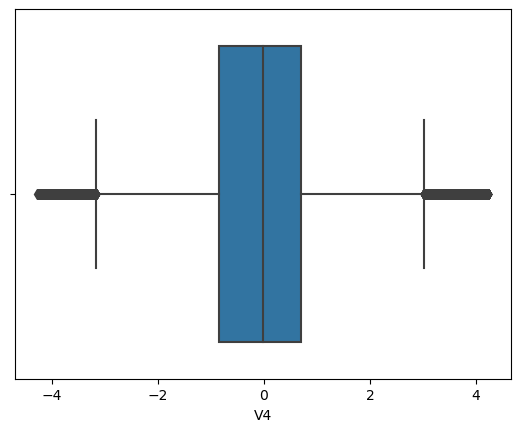

In [52]:
V1_median = df['V4'].median()
# Define a threshold for outliers (for example, anything more than 3 standard deviations from the median)
outlier_threshold = 3 * df['V4'].std()
                                                                                                   #handling outliers 
# Replace outliers with the median
df['V4'] = df['V4'].apply(lambda x: V1_median if abs(x - V1_median) > outlier_threshold else x)

sns.boxplot(df['V4'])

C:\ProgramData\anaconda3\ram\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='V5'>

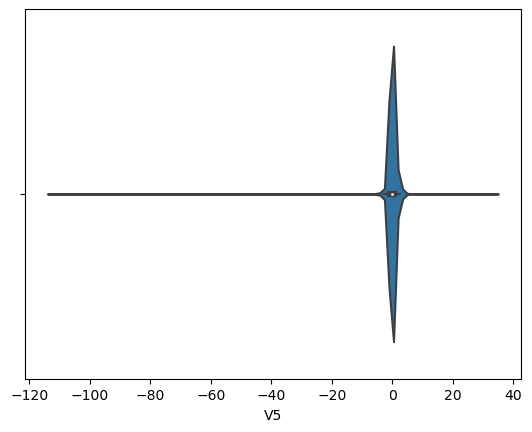

In [53]:
sns.violinplot(df['V5'])

C:\ProgramData\anaconda3\ram\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='V5'>

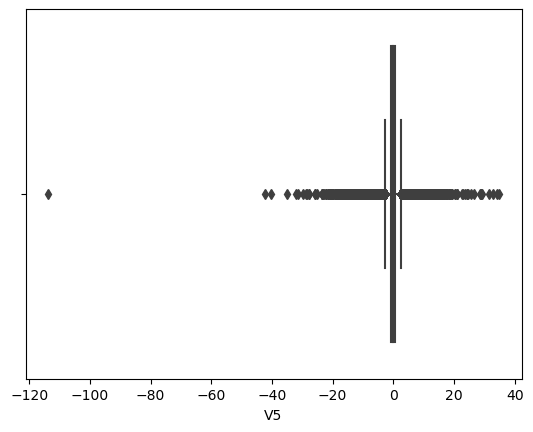

In [54]:
sns.boxplot(df['V5'])

In [55]:
def find_outliers(df, V5):
    q1 = df[V5].quantile(0.25)
    q3 = df[V5].quantile(0.75)
    iqr = q3 - q1
    lower_tail = q1 - 1.5 * iqr
    upper_tail = q3 + 1.5 * iqr
    outliers = df[(df[V5] < lower_tail) | (df[V5] > upper_tail)]
    return outliers


outliers = find_outliers(df, "V5")
outliers

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
11,10.0,0.384978,0.616109,-0.874300,-0.094019,2.924584,3.317027,0.470455,0.538247,-0.558895,...,0.049924,0.238422,0.009130,0.996710,-0.767315,-0.492208,0.042472,-0.054337,9.99,0
18,14.0,-5.401258,0.065486,1.186305,1.736239,3.049106,-1.763406,-1.559738,0.160842,1.233090,...,-0.503600,0.984460,2.458589,0.042119,-0.481631,-0.621272,0.392053,0.949594,46.80,0
24,22.0,-1.946525,-0.044901,-0.405570,-1.013057,2.941968,2.955053,-0.063063,0.855546,0.049967,...,-0.579526,-0.799229,0.870300,0.983421,0.321201,0.149650,0.707519,0.014600,0.89,0
51,36.0,-1.004929,-0.985978,-0.038039,3.710061,-6.631951,5.122103,4.371691,-2.006868,-0.278736,...,1.393406,-0.381671,0.969719,0.019445,0.570923,0.333278,0.857373,-0.075538,1402.95,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284784,172768.0,-0.669662,0.923769,-1.543167,-1.560729,2.833960,3.240843,0.181576,1.282746,-0.893890,...,0.183856,0.202670,-0.373023,0.651122,1.073823,0.844590,-0.286676,-0.187719,40.00,0
284785,172768.0,0.032887,0.545338,-1.185844,-1.729828,2.932315,3.401529,0.337434,0.925377,-0.165663,...,-0.266113,-0.716336,0.108519,0.688519,-0.460220,0.161939,0.265368,0.090245,1.79,0
284795,172778.0,0.018109,0.065486,0.179846,-2.510473,-4.586669,-1.394465,-3.632516,5.498583,4.893089,...,-0.944759,-1.565026,0.890675,-1.253276,1.786717,0.320763,2.090712,1.232864,9.87,0
284802,172786.0,0.018109,0.065486,0.179846,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0


C:\ProgramData\anaconda3\ram\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='V5'>

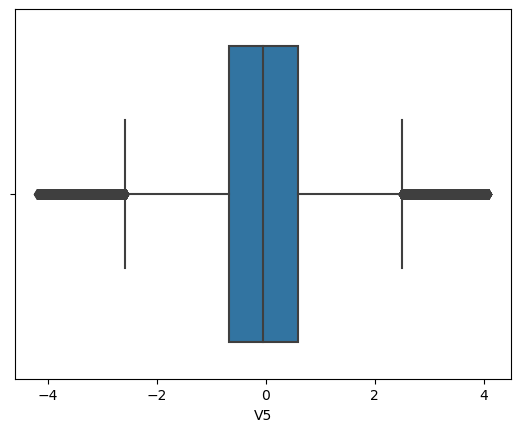

In [56]:
V1_median = df['V5'].median()
# Define a threshold for outliers (for example, anything more than 3 standard deviations from the median)
outlier_threshold = 3 * df['V5'].std()
                                                                                                   #handling outliers 
# Replace outliers with the median
df['V5'] = df['V5'].apply(lambda x: V1_median if abs(x - V1_median) > outlier_threshold else x)

sns.boxplot(df['V5'])

C:\ProgramData\anaconda3\ram\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='V5', ylabel='Density'>

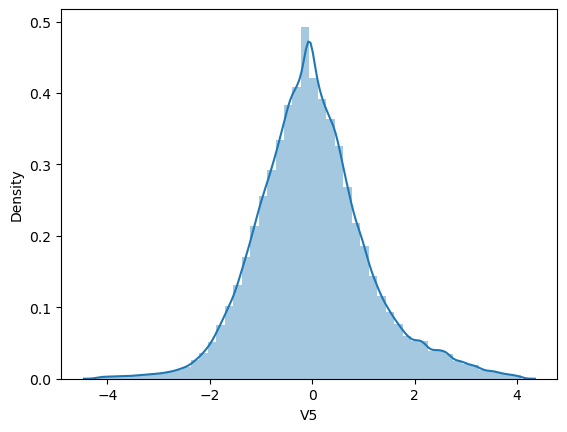

In [57]:
sns.distplot(df['V5'])

C:\ProgramData\anaconda3\ram\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='V6'>

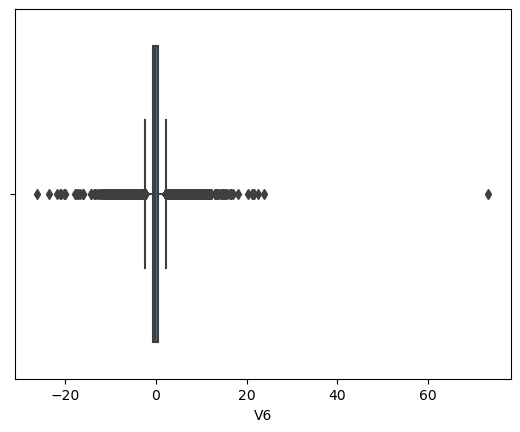

In [48]:
sns.boxplot(df['V6'])

In [49]:
def find_outliers(df, V6):
    q1 = df['V6'].quantile(0.25)
    q3 = df['V6'].quantile(0.75)
    iqr = q3 - q1
    lower_tail = q1 - 1.5 * iqr
    upper_tail = q3 + 1.5 * iqr
    outliers = df[(df['V6'] < lower_tail) | (df['V6'] > upper_tail)]
    return outliers

# Example usage:
outliers = find_outliers(df, "V6")
outliers

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
11,10.0,0.384978,0.616109,-0.874300,-0.094019,2.924584,3.317027,0.470455,0.538247,-0.558895,...,0.049924,0.238422,0.009130,0.996710,-0.767315,-0.492208,0.042472,-0.054337,9.99,0
24,22.0,-1.946525,-0.044901,-0.405570,-1.013057,2.941968,2.955053,-0.063063,0.855546,0.049967,...,-0.579526,-0.799229,0.870300,0.983421,0.321201,0.149650,0.707519,0.014600,0.89,0
40,32.0,1.249055,-0.624727,-0.710589,-0.991600,1.429973,3.692977,-1.090209,0.967291,0.850149,...,-0.006293,0.009200,-0.129463,1.112970,0.500382,1.196549,-0.048220,0.005094,29.89,0
51,36.0,-1.004929,-0.985978,-0.038039,3.710061,-6.631951,5.122103,4.371691,-2.006868,-0.278736,...,1.393406,-0.381671,0.969719,0.019445,0.570923,0.333278,0.857373,-0.075538,1402.95,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284787,172769.0,-1.029719,-1.110670,-0.636179,-0.840816,2.424360,-2.956733,0.283610,-0.332656,-0.247488,...,0.353722,0.488487,0.293632,0.107812,-0.935586,1.138216,0.025271,0.255347,9.99,0
284793,172775.0,1.971002,-0.699067,-1.697541,-0.617643,1.718797,3.911336,-1.259306,1.056209,1.315006,...,0.188758,0.694418,0.163002,0.726365,-0.058282,-0.191813,0.061858,-0.043716,4.99,0
284799,172783.0,-1.775135,-0.004235,1.189786,0.331096,1.196063,5.519980,-1.518185,2.080825,1.159498,...,0.103302,0.654850,-0.348929,0.745323,0.704545,-0.127579,0.454379,0.130308,79.99,0
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0


C:\ProgramData\anaconda3\ram\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='V6'>

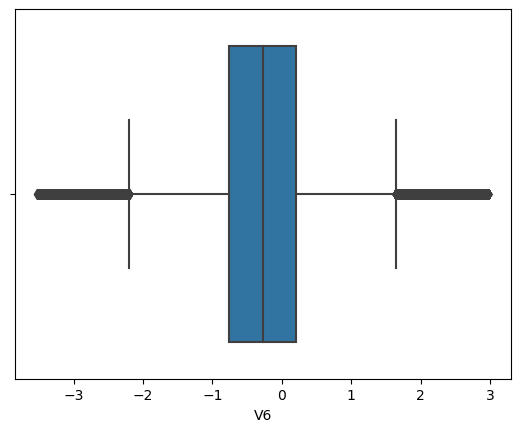

In [60]:
V1_median = df['V6'].median()
# Define a threshold for outliers (for example, anything more than 3 standard deviations from the median)
outlier_threshold = 3 * df['V6'].std()
                                                                                                   #handling outliers 
# Replace outliers with the median
df['V6'] = df['V6'].apply(lambda x: V1_median if abs(x - V1_median) > outlier_threshold else x)

sns.boxplot(df['V6'])

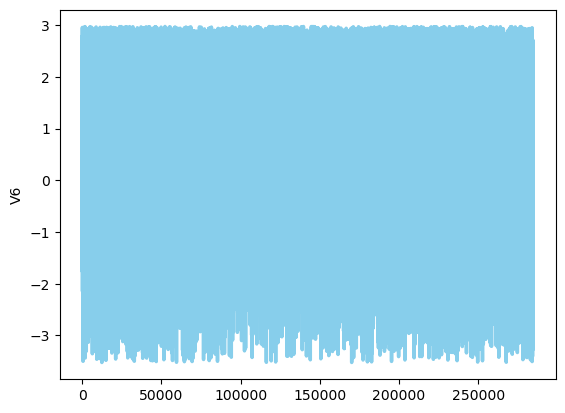

In [64]:
sns.lineplot(data=df['V6'], linewidth=2.5, color='skyblue')
plt.fill_between(df.index, df['V6'], color='skyblue', alpha=0.4)

C:\ProgramData\anaconda3\ram\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='V7'>

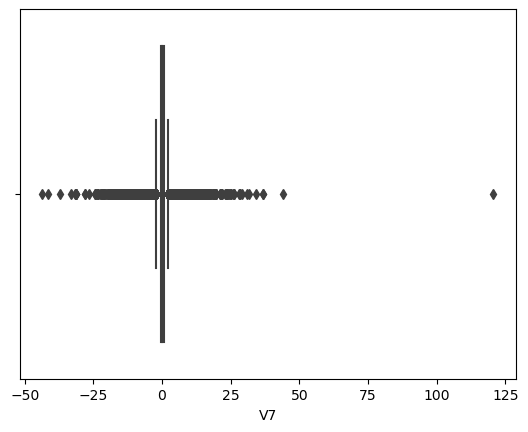

In [50]:
sns.boxplot(df['V7'])

In [51]:
def find_outliers(df, V7):
    q1 = df['V7'].quantile(0.25)
    q3 = df['V7'].quantile(0.75)
    iqr = q3 - q1
    lower_tail = q1 - 1.5 * iqr
    upper_tail = q3 + 1.5 * iqr
    outliers = df[(df['V7'] < lower_tail) | (df['V7'] > upper_tail)]
    return outliers

# Example usage:
outliers = find_outliers(df, "V7")
outliers

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
51,36.0,-1.004929,-0.985978,-0.038039,3.710061,-6.631951,5.122103,4.371691,-2.006868,-0.278736,...,1.393406,-0.381671,0.969719,0.019445,0.570923,0.333278,0.857373,-0.075538,1402.95,0
85,55.0,-4.575093,-4.429184,3.402585,0.903915,3.002224,-0.491078,-2.705393,0.666451,1.922216,...,-0.047365,0.853360,-0.971600,-0.114862,0.408300,-0.304576,0.547785,-0.456297,200.01,0
140,87.0,-5.101877,1.897022,-3.458034,-1.277543,-5.517758,2.098366,3.329603,1.250966,0.271501,...,-0.871744,-0.678879,-0.555900,-0.761660,0.066611,0.767227,0.731634,-0.860310,919.60,0
150,93.0,-1.640014,-0.479831,1.613630,2.997979,-3.803788,5.051812,3.315254,-0.303785,0.671395,...,-0.367933,0.641891,-0.405779,-1.268700,0.494090,0.610967,0.608993,-0.410034,937.69,0
164,103.0,-6.093248,-12.114213,-5.694973,3.294389,-1.413792,4.776000,4.808426,-0.228197,-0.525896,...,2.228823,-2.264037,-3.553381,1.215279,-0.406073,-0.653384,-0.711222,0.672900,3828.04,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284649,172642.0,-11.946976,9.772660,-8.006237,-2.498596,-4.229520,-1.320039,-3.259766,5.059956,4.870093,...,-0.957977,-1.529035,0.838689,-1.249172,1.714495,0.314623,2.112848,1.234408,10.74,0
284698,172693.0,-0.857688,0.290945,-2.391448,-0.315457,-0.014455,-1.765595,2.671779,-0.511257,-0.740175,...,0.484050,1.826575,0.862395,0.586089,-1.036145,0.659765,0.436365,0.173492,307.88,0
284733,172726.0,-1.353026,0.289945,0.173684,-3.780442,-1.173016,-0.159307,3.009433,-1.544902,1.422788,...,0.415421,-0.701799,-0.144663,1.056709,1.074381,-1.129447,0.033781,-0.325899,405.09,0
284795,172778.0,-12.516732,10.187818,-8.476671,-2.510473,-4.586669,-1.394465,-3.632516,5.498583,4.893089,...,-0.944759,-1.565026,0.890675,-1.253276,1.786717,0.320763,2.090712,1.232864,9.87,0


In [52]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


C:\ProgramData\anaconda3\ram\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='V7'>

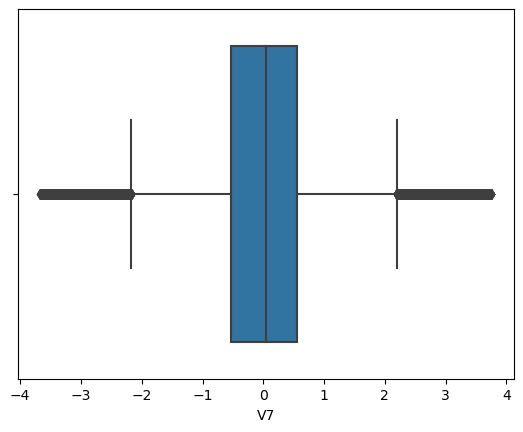

In [65]:
V1_median = df['V7'].median()
# Define a threshold for outliers (for example, anything more than 3 standard deviations from the median)
outlier_threshold = 3 * df['V7'].std()
                                                                                                   #handling outliers 
# Replace outliers with the median
df['V7'] = df['V7'].apply(lambda x: V1_median if abs(x - V1_median) > outlier_threshold else x)

sns.boxplot(df['V7'])

<AxesSubplot:xlabel='V7', ylabel='Count'>

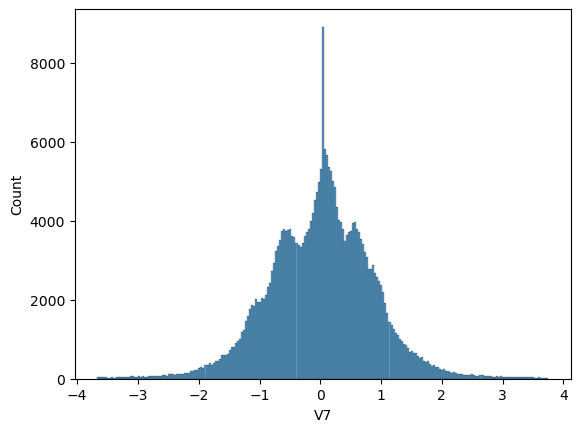

In [67]:
sns.histplot(df['V7'])

C:\ProgramData\anaconda3\ram\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='V8'>

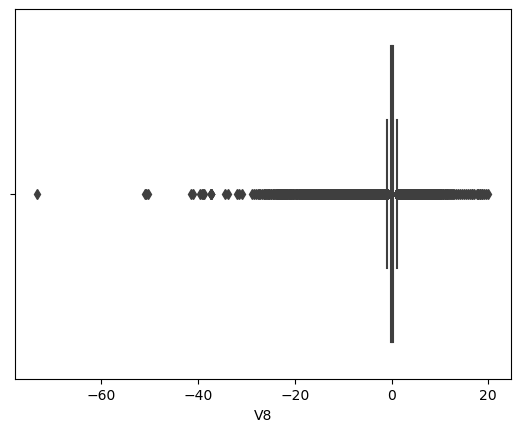

In [53]:
sns.boxplot(df['V8'])

In [5]:
def find_outliers(df, V8):
    q1 = df['V8'].quantile(0.25)
    q3 = df['V8'].quantile(0.75)
    iqr = q3 - q1
    lower_tail = q1 - 1.5 * iqr
    upper_tail = q3 + 1.5 * iqr
    outliers = df[(df['V8'] < lower_tail) | (df['V8'] > upper_tail)]
    return outliers

# Example usage:
outliers = find_outliers(df, "V8")
outliers

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
14,12.0,-2.791855,-0.327771,1.641750,1.767473,-0.136588,0.807596,-0.422911,-1.907107,0.755713,...,1.151663,0.222182,1.020586,0.028317,-0.232746,-0.235557,-0.164778,-0.030154,58.80,0
23,18.0,0.247491,0.277666,1.185471,-0.092603,-1.314394,-0.150116,-0.946365,-1.617935,1.544071,...,1.650180,0.200454,-0.185353,0.423073,0.820591,-0.227632,0.336634,0.250475,22.75,0
41,32.0,-2.008872,2.198527,0.144242,1.159432,-0.815174,0.182288,-0.617108,1.530817,-0.586832,...,0.094917,0.294983,0.011081,0.015249,0.034211,-0.236141,0.128291,0.117986,2.35,0
51,36.0,-1.004929,-0.985978,-0.038039,3.710061,-6.631951,5.122103,4.371691,-2.006868,-0.278736,...,1.393406,-0.381671,0.969719,0.019445,0.570923,0.333278,0.857373,-0.075538,1402.95,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284784,172768.0,-0.669662,0.923769,-1.543167,-1.560729,2.833960,3.240843,0.181576,1.282746,-0.893890,...,0.183856,0.202670,-0.373023,0.651122,1.073823,0.844590,-0.286676,-0.187719,40.00,0
284789,172770.0,-0.446951,1.302212,-0.168583,0.981577,0.578957,-0.605641,1.253430,-1.042610,-0.417116,...,0.851800,0.305268,-0.148093,-0.038712,0.010209,-0.362666,0.503092,0.229921,60.50,0
284795,172778.0,-12.516732,10.187818,-8.476671,-2.510473,-4.586669,-1.394465,-3.632516,5.498583,4.893089,...,-0.944759,-1.565026,0.890675,-1.253276,1.786717,0.320763,2.090712,1.232864,9.87,0
284799,172783.0,-1.775135,-0.004235,1.189786,0.331096,1.196063,5.519980,-1.518185,2.080825,1.159498,...,0.103302,0.654850,-0.348929,0.745323,0.704545,-0.127579,0.454379,0.130308,79.99,0


C:\ProgramData\anaconda3\ram\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='V8'>

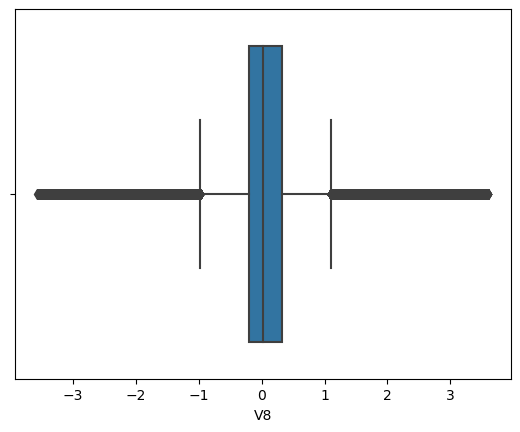

In [6]:
V1_median = df['V8'].median()
# Define a threshold for outliers (for example, anything more than 3 standard deviations from the median)
outlier_threshold = 3 * df['V8'].std()
                                                                                                   #handling outliers 
# Replace outliers with the median
df['V8'] = df['V8'].apply(lambda x: V1_median if abs(x - V1_median) > outlier_threshold else x)

sns.boxplot(df['V8'])

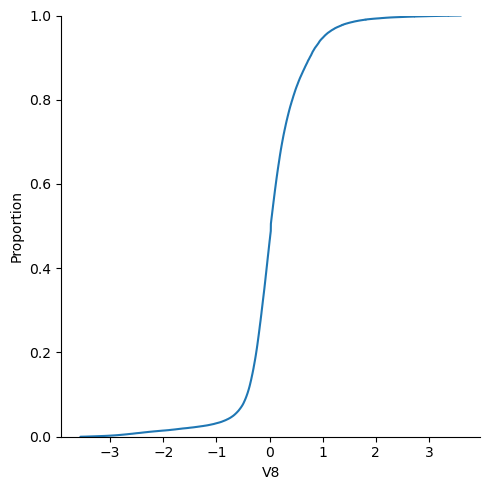

In [8]:
sns.displot(df['V8'],kind="ecdf")

C:\ProgramData\anaconda3\ram\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='V9'>

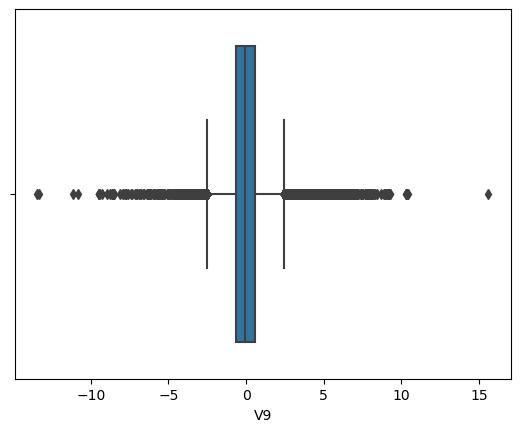

In [55]:
sns.boxplot(df['V9'])

In [9]:
def find_outliers(df, V9):
    q1 = df['V9'].quantile(0.25)
    q3 = df['V9'].quantile(0.75)
    iqr = q3 - q1
    lower_tail = q1 - 1.5 * iqr
    upper_tail = q3 + 1.5 * iqr
    outliers = df[(df['V9'] < lower_tail) | (df['V9'] > upper_tail)]
    return outliers

# Example usage:
outliers = find_outliers(df, "V9")
outliers

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
82,52.0,-3.005237,2.600138,1.483691,-2.418473,0.306326,-0.824575,2.065426,-1.829347,4.009259,...,-0.852309,-0.181268,-0.163747,0.515821,0.136318,0.460054,-0.251259,-1.105751,1.46,0
146,92.0,-5.285971,4.847323,-1.290368,-1.427842,-0.621533,-0.604691,0.437866,0.336384,3.558373,...,-0.923604,-1.171187,0.150872,-0.493322,1.050554,0.194865,2.490503,1.575380,8.95,0
225,147.0,-2.687978,4.390230,-2.360483,0.360829,1.310192,-1.645253,2.327776,-1.727825,4.324752,...,-1.045961,-0.156951,0.079854,-0.012598,0.207194,-0.536578,0.950393,-0.624431,0.89,0
290,209.0,-5.852465,5.267376,-1.761895,-1.441250,-0.988529,-0.672187,0.075760,0.774198,3.580112,...,-0.910910,-1.204988,0.215766,-0.498066,1.125918,0.201450,2.468867,1.573084,8.97,0
321,235.0,-0.663511,-0.044443,1.029253,-2.498072,-1.350085,-0.798774,-0.581071,0.480997,-2.517037,...,-0.051895,0.070846,0.039321,0.275750,-0.330251,-0.423936,0.251989,0.133957,25.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284645,172638.0,-2.521887,1.720516,-0.890967,4.516690,0.103394,0.410173,2.650895,-0.619516,-2.625264,...,-0.027684,1.038627,-0.592359,0.038390,1.155201,0.856059,-0.970223,-0.698047,302.10,0
284649,172642.0,-11.946976,9.772660,-8.006237,-2.498596,-4.229520,-1.320039,-3.259766,0.022358,4.870093,...,-0.957977,-1.529035,0.838689,-1.249172,1.714495,0.314623,2.112848,1.234408,10.74,0
284713,172705.0,-3.720457,3.879489,-2.560775,-2.177371,0.495872,-1.247785,1.337622,0.014269,2.705118,...,-0.235634,0.579972,-0.017147,0.647609,0.405239,0.059625,1.596482,0.717827,0.92,0
284774,172762.0,-0.725459,0.194981,-1.785571,-3.779860,2.177420,2.975713,-0.239695,0.912303,-3.159994,...,0.046103,0.102480,-0.461027,0.717647,1.253036,0.207138,-0.630549,-0.163911,7.00,0


C:\ProgramData\anaconda3\ram\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='V9'>

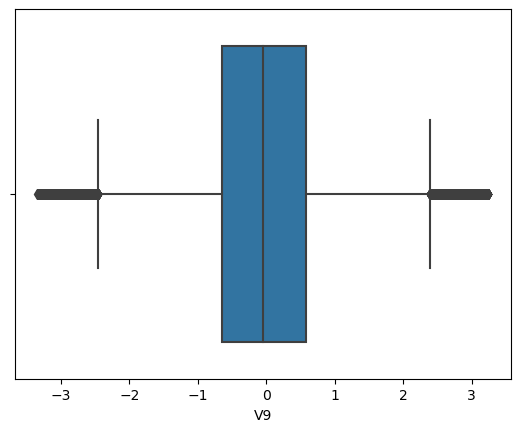

In [10]:
V1_median = df['V9'].median()
# Define a threshold for outliers (for example, anything more than 3 standard deviations from the median)
outlier_threshold = 3 * df['V9'].std()
                                                                                                   #handling outliers 
# Replace outliers with the median
df['V9'] = df['V9'].apply(lambda x: V1_median if abs(x - V1_median) > outlier_threshold else x)

sns.boxplot(df['V9'])

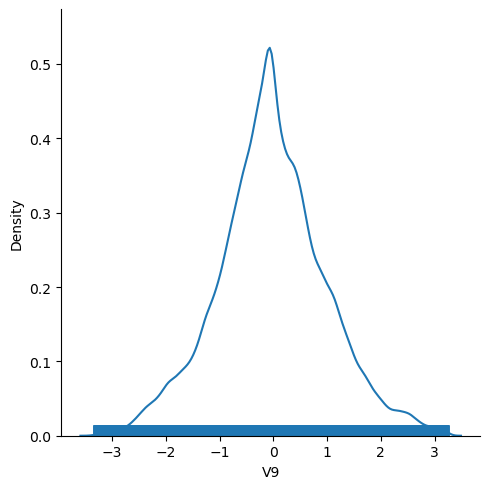

In [12]:
g = sns.displot(df['V9'],kind="kde", rug=True)

C:\ProgramData\anaconda3\ram\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='V10'>

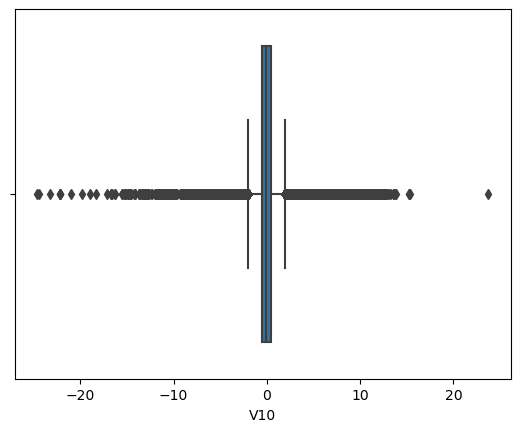

In [57]:
sns.boxplot(df['V10'])

In [58]:
def find_outliers(df, V10):
    q1 = df['V10'].quantile(0.25)
    q3 = df['V10'].quantile(0.75)
    iqr = q3 - q1
    lower_tail = q1 - 1.5 * iqr
    upper_tail = q3 + 1.5 * iqr
    outliers = df[(df['V10'] < lower_tail) | (df['V10'] > upper_tail)]
    return outliers

# Example usage:
outliers = find_outliers(df, "V10")
outliers

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
82,52.0,-3.005237,2.600138,1.483691,-2.418473,0.306326,-0.824575,2.065426,-1.829347,4.009259,...,-0.852309,-0.181268,-0.163747,0.515821,0.136318,0.460054,-0.251259,-1.105751,1.46,0
132,83.0,-1.864990,0.910874,1.724863,-1.748371,0.578943,-0.832531,1.901440,-1.913986,2.112375,...,-0.318597,0.073323,-0.061693,0.547204,-0.466798,0.408030,-2.377933,-1.255549,7.69,0
146,92.0,-5.285971,4.847323,-1.290368,-1.427842,-0.621533,-0.604691,0.437866,0.336384,3.558373,...,-0.923604,-1.171187,0.150872,-0.493322,1.050554,0.194865,2.490503,1.575380,8.95,0
190,125.0,-2.807065,1.183098,2.974779,2.801477,-0.475110,3.217829,-0.401608,0.384395,2.408675,...,-0.201782,1.461535,-0.000330,-0.581133,-0.101785,0.529386,0.362411,0.237647,43.71,0
225,147.0,-2.687978,4.390230,-2.360483,0.360829,1.310192,-1.645253,2.327776,-1.727825,4.324752,...,-1.045961,-0.156951,0.079854,-0.012598,0.207194,-0.536578,0.950393,-0.624431,0.89,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284742,172734.0,-1.248847,2.279478,-1.144824,-0.263061,0.070912,-0.323414,-1.454139,-5.069379,-0.827733,...,-2.704489,0.261945,0.490272,-0.112758,-0.453183,-0.694933,-0.106693,0.082714,9.99,0
284765,172754.0,-2.433477,2.859978,-1.714267,-1.964427,1.070515,-1.098247,1.814726,-0.508294,1.980996,...,-0.192003,0.781494,-0.167831,0.682687,0.110603,-0.020888,0.752567,-0.029560,0.77,0
284772,172760.0,-6.713826,2.369104,-3.534768,-0.368259,-1.721030,-1.322808,-0.190876,0.891149,2.068476,...,0.131247,0.994246,-0.002140,-0.072979,-0.167159,-0.387271,-2.616341,0.474584,19.59,0
284795,172778.0,-12.516732,10.187818,-8.476671,-2.510473,-4.586669,-1.394465,-3.632516,5.498583,4.893089,...,-0.944759,-1.565026,0.890675,-1.253276,1.786717,0.320763,2.090712,1.232864,9.87,0


C:\ProgramData\anaconda3\ram\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='V10'>

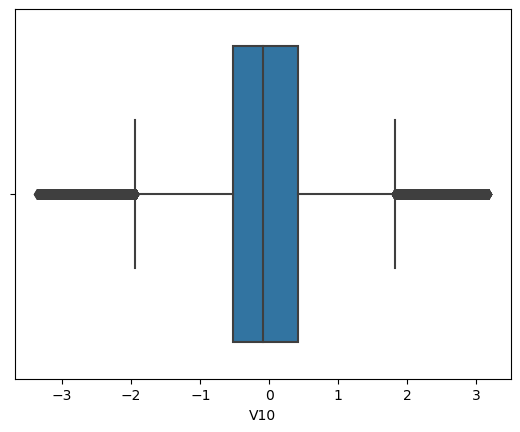

In [13]:
V1_median = df['V10'].median()
# Define a threshold for outliers (for example, anything more than 3 standard deviations from the median)
outlier_threshold = 3 * df['V10'].std()
                                                                                                   #handling outliers 
# Replace outliers with the median
df['V10'] = df['V10'].apply(lambda x: V1_median if abs(x - V1_median) > outlier_threshold else x)

sns.boxplot(df['V10'])

<AxesSubplot:xlabel='V10', ylabel='Proportion'>

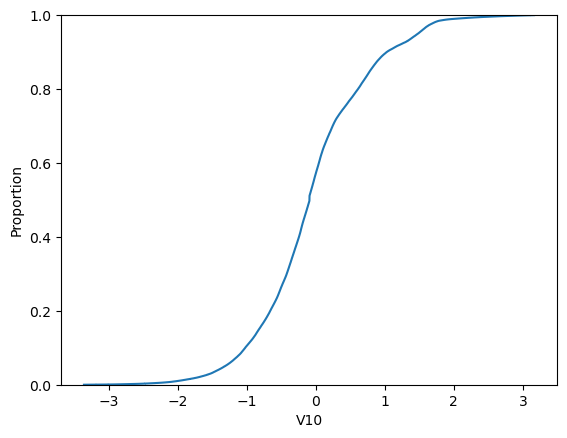

In [15]:
sns.ecdfplot(df['V10'])

In [ ]:
sns.boxplot(df['V11'])

In [60]:
def find_outliers(df, V11):
    q1 = df['V11'].quantile(0.25)
    q3 = df['V11'].quantile(0.75)
    iqr = q3 - q1
    lower_tail = q1 - 1.5 * iqr
    upper_tail = q3 + 1.5 * iqr
    outliers = df[(df['V11'] < lower_tail) | (df['V11'] > upper_tail)]
    return outliers

# Example usage:
outliers = find_outliers(df, "V11")
outliers

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
1632,1264.0,-11.140706,-9.612726,-12.389545,6.013346,-32.092129,21.393069,34.303177,-7.520784,-1.925732,...,-4.709977,1.366110,-2.925888,0.843551,0.746267,0.801387,3.852046,4.157934,7712.43,0
2696,2239.0,-1.695428,2.962061,-0.571190,1.438979,1.244142,-0.769186,1.341731,-0.474741,-0.033600,...,-0.321093,-0.151016,-0.397710,-0.103226,0.733487,-0.063119,0.105111,0.014316,1.59,0
2905,2443.0,1.120023,1.215735,-1.508905,1.534021,1.033699,-1.130404,0.669449,-0.160009,-0.838148,...,-0.100463,-0.187728,-0.187765,-0.079737,0.747233,-0.298629,0.055021,0.089543,15.41,0
4025,3664.0,1.009551,0.107880,0.315132,0.581409,0.479801,1.318387,-0.494371,0.512347,1.179214,...,-0.271421,-0.489534,0.257946,-1.144527,-0.186542,0.169133,0.009816,-0.000763,11.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282863,171200.0,-15.103308,11.874957,-11.907335,-1.110679,-8.266879,-2.934550,-7.479686,9.835984,2.323339,...,0.401829,0.330268,1.422984,-0.132711,1.285922,-0.048866,0.566245,0.886527,3.82,0
282881,171207.0,-15.663791,12.302783,-12.374202,-1.126277,-8.626748,-3.005796,-7.849644,10.274815,2.345430,...,0.414795,0.296912,1.487415,-0.137588,1.361012,-0.042063,0.545297,0.884608,3.82,0
282903,171234.0,-16.224299,12.730564,-12.841065,-1.141867,-8.986583,-3.077067,-8.219623,10.713656,2.367518,...,0.427780,0.263553,1.551892,-0.142470,1.436109,-0.035261,0.524327,0.882698,3.82,0
282919,171247.0,-9.035117,7.062340,-6.398694,-0.907413,-6.036953,-1.251885,-6.348586,7.613111,-0.318522,...,0.517131,-0.942231,1.107292,0.555764,0.509299,-0.338584,-2.650287,-0.633194,0.77,0


C:\ProgramData\anaconda3\ram\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='V11'>

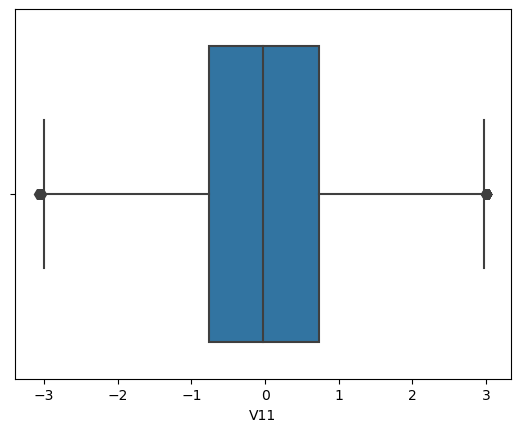

In [16]:
V1_median = df['V11'].median()
# Define a threshold for outliers (for example, anything more than 3 standard deviations from the median)
outlier_threshold = 3 * df['V11'].std()
                                                                                                   #handling outliers 
# Replace outliers with the median
df['V11'] = df['V11'].apply(lambda x: V1_median if abs(x - V1_median) > outlier_threshold else x)

sns.boxplot(df['V11'])

C:\ProgramData\anaconda3\ram\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='V11'>

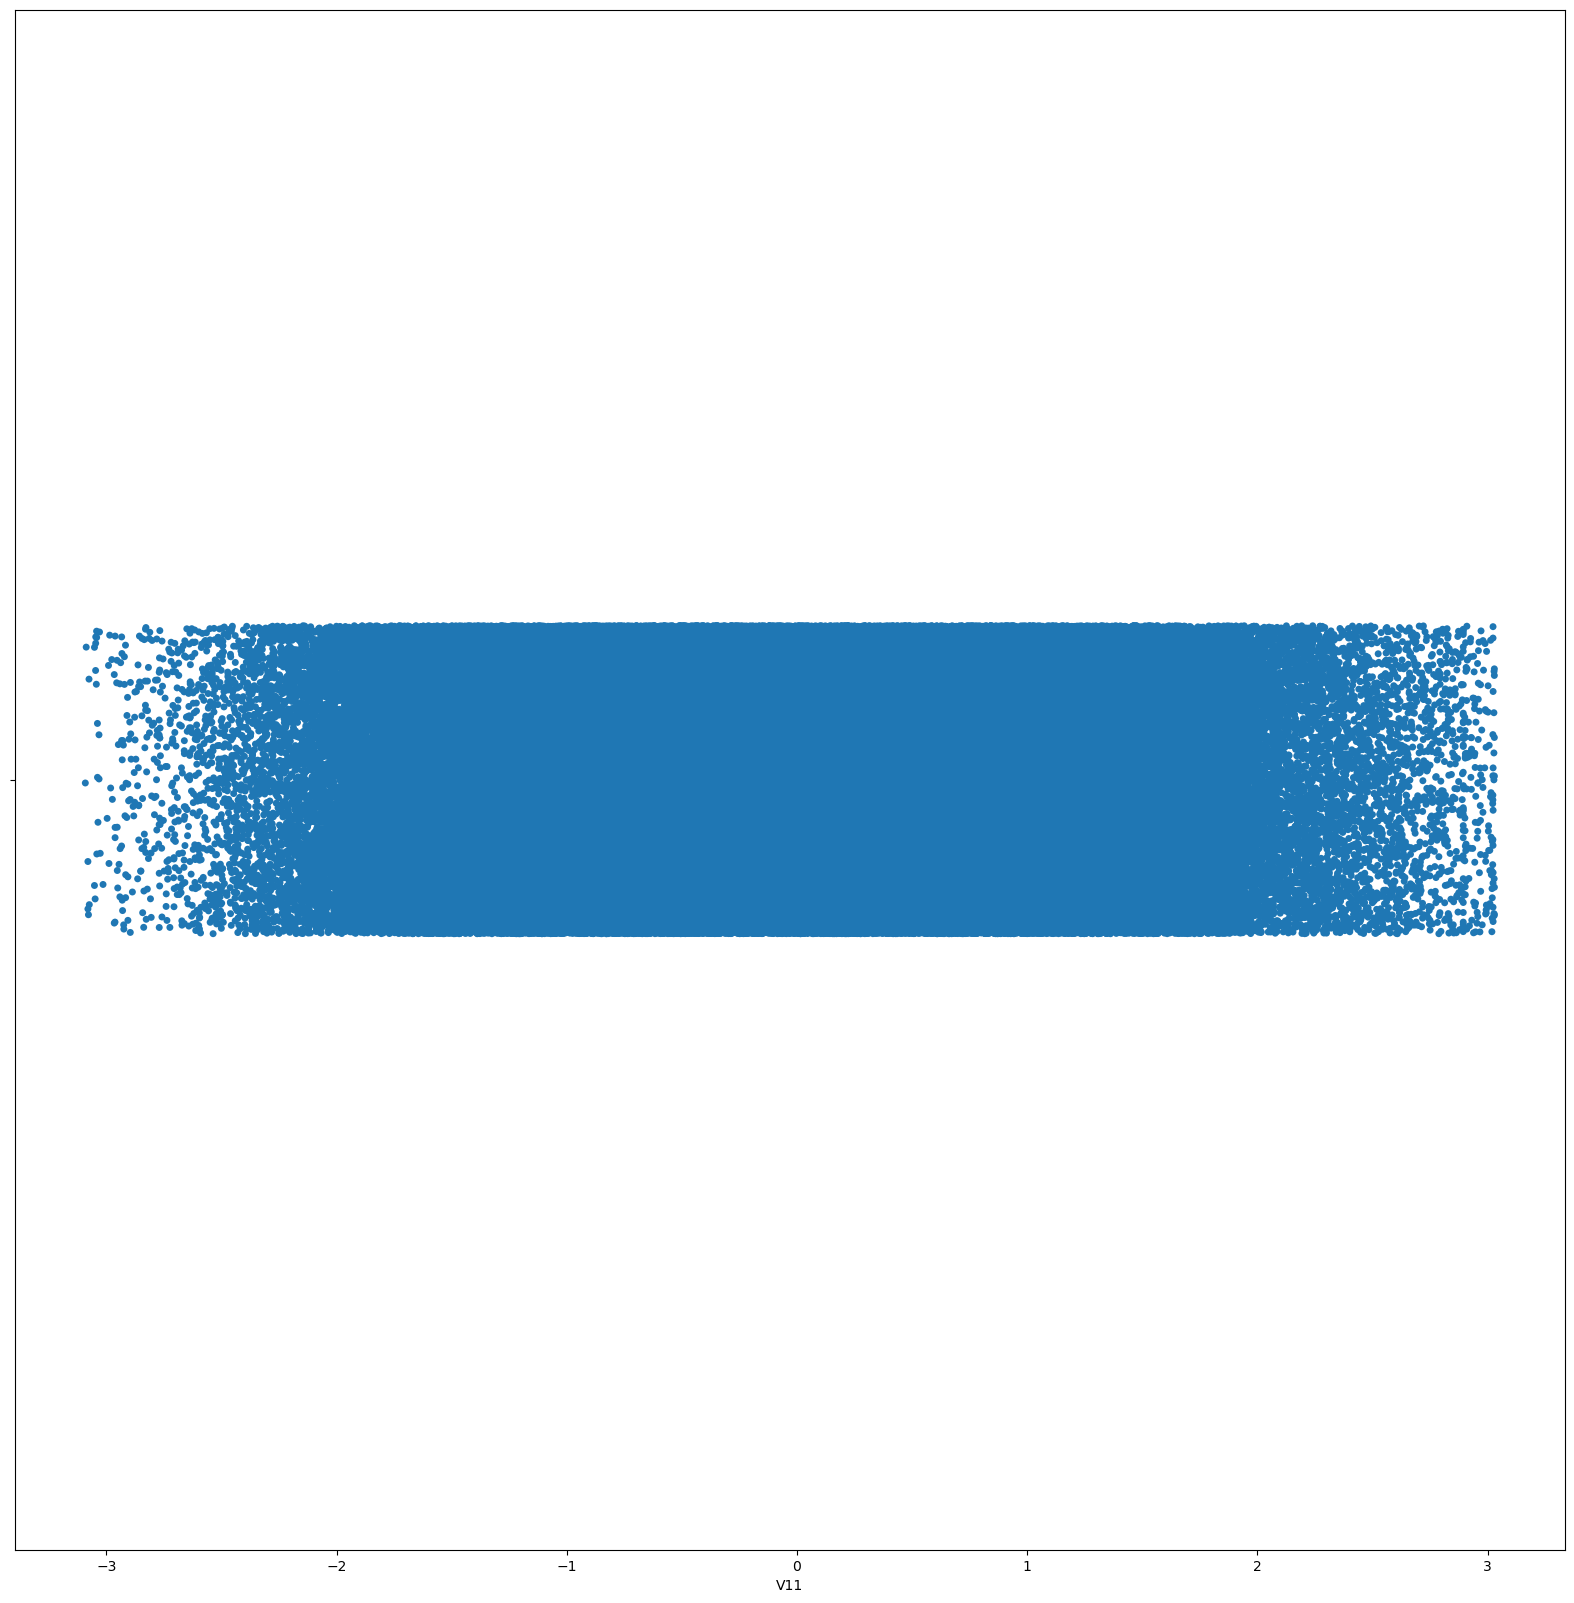

In [24]:
plt.figure(figsize=(20,20))
sns.stripplot(df['V11'])

C:\ProgramData\anaconda3\ram\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='V12'>

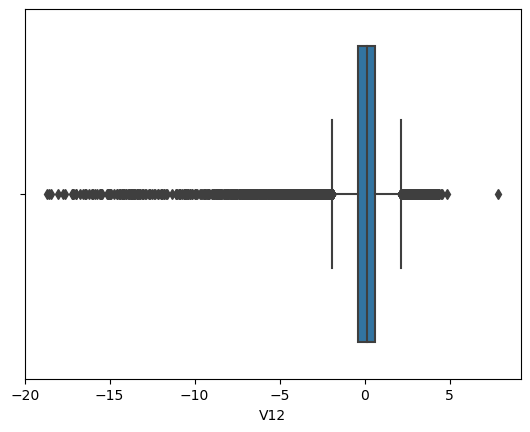

In [61]:
sns.boxplot(df['V12'])

In [62]:
def find_outliers(df, V12):
    q1 = df['V12'].quantile(0.25)
    q3 = df['V12'].quantile(0.75)
    iqr = q3 - q1
    lower_tail = q1 - 1.5 * iqr
    upper_tail = q3 + 1.5 * iqr
    outliers = df[(df['V12'] < lower_tail) | (df['V12'] > upper_tail)]
    return outliers

# Example usage:
outliers = find_outliers(df, "V12")
outliers

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
460,339.0,0.503302,0.930065,-0.857525,2.042940,-1.505946,-1.000185,-1.991363,0.460577,-1.124101,...,0.379925,-0.062191,-0.012187,0.479788,0.531947,-0.441323,0.460792,0.219985,2.00,0
472,347.0,-1.531271,1.399621,-0.587061,2.175002,-2.137637,-0.501576,-1.215215,0.956862,-1.866561,...,0.557904,0.085267,0.403096,0.454438,0.202522,-0.313118,0.527182,0.202575,204.03,0
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
1388,1077.0,-3.936794,-3.670519,-1.453820,2.299750,-9.749440,6.456410,10.784088,-2.160016,-0.238116,...,-0.979104,0.957186,2.441960,0.250607,0.300908,1.157867,1.624284,-1.638647,2452.03,0
1815,1409.0,-2.586169,-1.073040,2.392480,-3.280437,-0.185766,2.251754,-2.178799,-1.620027,2.757823,...,-1.044110,1.921347,-0.379853,-0.927246,0.454492,-0.638208,0.262021,0.034329,96.39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284561,172558.0,-6.491016,5.700607,-6.421237,-0.971126,-2.902874,-0.713295,-3.470382,5.332066,-0.143787,...,-0.192001,-1.321234,0.617429,-0.559790,0.515726,0.232630,-0.113612,-0.056250,16.98,0
284649,172642.0,-11.946976,9.772660,-8.006237,-2.498596,-4.229520,-1.320039,-3.259766,5.059956,4.870093,...,-0.957977,-1.529035,0.838689,-1.249172,1.714495,0.314623,2.112848,1.234408,10.74,0
284746,172735.0,-0.899559,-0.047744,0.717555,-3.262816,-0.384415,-0.164529,-0.227184,0.272726,-1.835745,...,-0.289810,-0.464731,-0.434248,0.009776,0.803066,-0.129513,-0.176856,-0.190917,10.00,0
284795,172778.0,-12.516732,10.187818,-8.476671,-2.510473,-4.586669,-1.394465,-3.632516,5.498583,4.893089,...,-0.944759,-1.565026,0.890675,-1.253276,1.786717,0.320763,2.090712,1.232864,9.87,0


C:\ProgramData\anaconda3\ram\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='V12'>

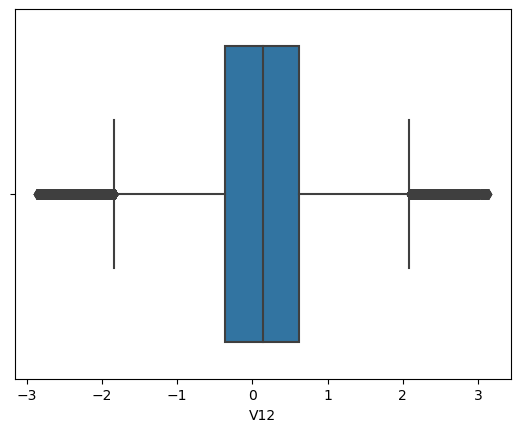

In [5]:
V1_median = df['V12'].median()
# Define a threshold for outliers (for example, anything more than 3 standard deviations from the median)
outlier_threshold = 3 * df['V12'].std()
                                                                                                   #handling outliers 
# Replace outliers with the median
df['V12'] = df['V12'].apply(lambda x: V1_median if abs(x - V1_median) > outlier_threshold else x)

sns.boxplot(df['V12'])

<AxesSubplot:xlabel='V12', ylabel='Density'>

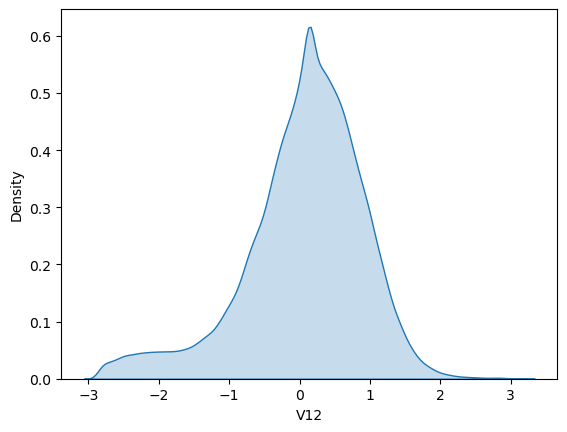

In [6]:

sns.kdeplot(df['V12'], shade=True)

C:\ProgramData\anaconda3\ram\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='V13'>

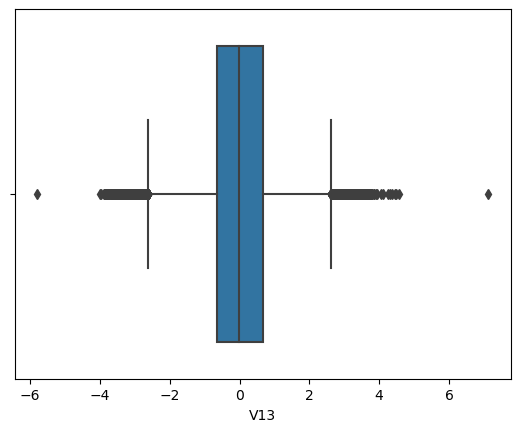

In [7]:
sns.boxplot(df['V13'])

In [64]:
def find_outliers(df, V13):
    q1 = df['V13'].quantile(0.25)
    q3 = df['V13'].quantile(0.75)
    iqr = q3 - q1
    lower_tail = q1 - 1.5 * iqr
    upper_tail = q3 + 1.5 * iqr
    outliers = df[(df['V13'] < lower_tail) | (df['V13'] > upper_tail)]
    return outliers

# Example usage:
outliers = find_outliers(df, "V13")
outliers

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
343,251.0,-0.238643,-0.146691,0.829323,-1.776739,-0.080048,-0.747509,0.404431,-0.103809,-0.753139,...,0.219065,0.729404,-0.163950,-0.020061,-0.325685,-0.349223,0.203501,-0.005249,24.00,0
1182,921.0,-2.253939,-2.759873,0.781548,1.012633,2.787428,-2.161630,-0.909178,-0.049553,-0.250211,...,0.291442,-0.036263,1.046883,-0.054876,-0.986290,0.325069,0.069019,0.313051,158.00,0
1185,922.0,-2.842932,-1.138905,0.802236,-0.092841,1.595405,-1.580699,-0.161216,0.263178,-0.340213,...,-0.177517,-0.222918,0.994233,-0.053079,0.256120,0.345881,0.199538,-0.008817,1.00,0
1287,997.0,-0.585360,0.396461,2.684421,1.418844,-0.246061,1.210571,0.152464,0.224679,1.067010,...,-0.444175,-0.513923,-0.158669,-0.034219,-0.231110,-0.448772,-0.026717,-0.283808,10.81,0
1401,1083.0,-3.021118,-0.595966,0.166745,-0.041547,-0.021008,-0.647489,0.675284,0.406339,-0.485760,...,-0.265088,-0.019832,1.158725,-0.019425,0.344360,0.402243,-0.042749,-0.284025,158.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284349,172361.0,1.996092,-0.011789,-1.663214,1.430116,0.173194,-1.207430,0.484928,-0.272665,0.602746,...,0.028963,0.148047,0.016134,-0.079691,0.362227,-0.482248,-0.035043,-0.064975,24.45,0
284359,172375.0,-0.106599,0.819665,-0.250261,1.047880,0.523174,0.337209,0.228407,0.246928,0.030372,...,0.043443,0.393717,-0.164809,0.198694,-0.464423,1.022105,0.292956,0.240668,12.50,0
284650,172642.0,-0.536065,0.562832,-0.008392,-0.581345,0.276563,-1.220086,0.743952,-0.057902,0.725102,...,-0.364140,-0.850069,0.316233,-0.207318,-0.477137,0.163041,0.263792,0.110287,8.82,0
284726,172715.0,1.615707,-0.898609,-0.562272,1.260583,-0.684711,0.234819,-0.643286,0.329931,1.064298,...,0.336993,0.565339,0.071710,0.613982,-0.276258,-0.618263,0.002865,-0.012795,160.00,0


C:\ProgramData\anaconda3\ram\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='V13'>

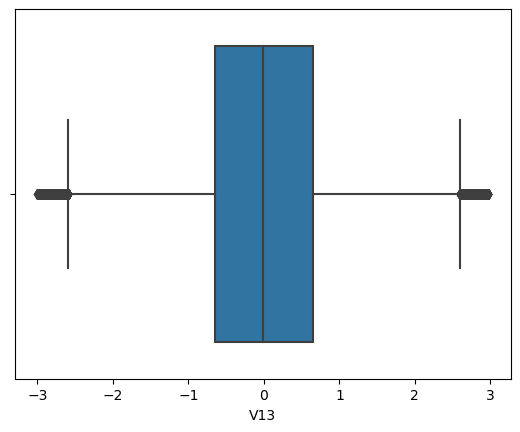

In [8]:
V1_median = df['V13'].median()
# Define a threshold for outliers (for example, anything more than 3 standard deviations from the median)
outlier_threshold = 3 * df['V13'].std()
                                                                                                   #handling outliers 
# Replace outliers with the median
df['V13'] = df['V13'].apply(lambda x: V1_median if abs(x - V1_median) > outlier_threshold else x)

sns.boxplot(df['V13'])

C:\ProgramData\anaconda3\ram\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='V13', ylabel='Density'>

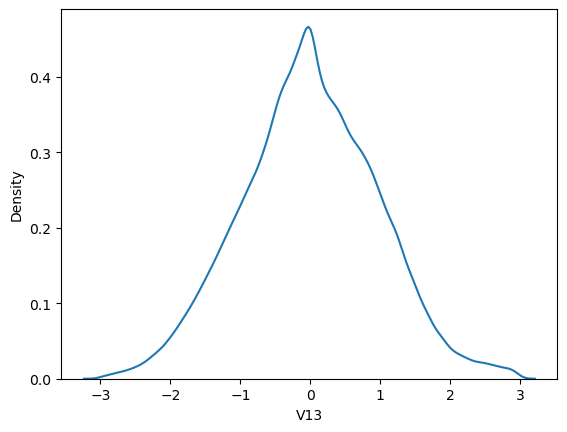

In [9]:
sns.distplot(df['V13'], hist=False)

C:\ProgramData\anaconda3\ram\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='V14'>

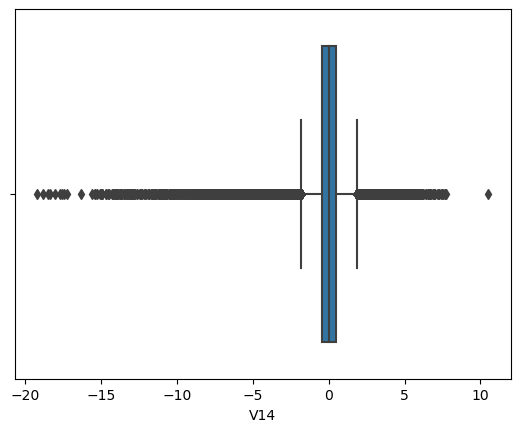

In [65]:
sns.boxplot(df['V14'])

In [3]:
def find_outliers(df, V14):
    q1 = df['V14'].quantile(0.25)
    q3 = df['V14'].quantile(0.75)
    iqr = q3 - q1
    lower_tail = q1 - 1.5 * iqr
    upper_tail = q3 + 1.5 * iqr
    outliers = df[(df['V14'] < lower_tail) | (df['V14'] > upper_tail)]
    return outliers

# Example usage:
outliers = find_outliers(df, "V14")
outliers

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
82,52.0,-3.005237,2.600138,1.483691,-2.418473,0.306326,-0.824575,2.065426,-1.829347,4.009259,...,-0.852309,-0.181268,-0.163747,0.515821,0.136318,0.460054,-0.251259,-1.105751,1.46,0
102,69.0,0.298503,2.142722,-1.542143,1.561332,0.938108,-2.145673,1.405569,-0.778459,0.328636,...,-0.290987,-0.000235,0.092174,0.586205,-0.397314,-0.480949,0.251145,-0.242279,0.78,0
104,69.0,-1.766645,2.352984,-0.009955,-0.363736,1.460953,-0.204833,0.905819,-3.384123,0.388546,...,1.964253,-0.883218,-0.247698,-0.758606,0.086450,0.202790,-0.898858,-0.944337,0.76,0
108,73.0,1.162281,1.248178,-1.581317,1.475024,1.138357,-1.020373,0.638387,-0.136762,-0.805505,...,-0.124012,-0.227150,-0.199185,-0.289757,0.776244,-0.283950,0.056747,0.084706,1.00,0
146,92.0,-5.285971,4.847323,-1.290368,-1.427842,-0.621533,-0.604691,0.437866,0.336384,3.558373,...,-0.923604,-1.171187,0.150872,-0.493322,1.050554,0.194865,2.490503,1.575380,8.95,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284669,172662.0,1.881521,1.192582,-1.740006,3.960403,1.282432,-0.164267,0.404690,-0.033758,-1.450298,...,-0.384278,-1.057652,0.248409,-0.762209,-0.218859,-0.333818,0.001098,0.004853,4.73,0
284721,172710.0,-2.516013,2.481932,-0.683786,-0.621718,0.596987,-1.384147,1.579089,-1.314013,1.618929,...,0.288237,1.314473,-0.176766,0.356307,-0.516441,-0.450529,-1.984913,-0.222766,7.45,0
284758,172745.0,1.911377,1.220896,-1.665127,4.148798,1.029442,-0.727610,0.500745,-0.198614,-1.140565,...,-0.429116,-1.184198,0.288661,-0.418323,-0.222729,-0.335830,-0.001158,0.017556,6.75,0
284782,172767.0,-0.268061,2.540315,-1.400915,4.846661,0.639105,0.186479,-0.045911,0.936448,-2.419986,...,-0.263889,-0.857904,0.235172,-0.681794,-0.668894,0.044657,-0.066751,-0.072447,12.82,0


C:\ProgramData\anaconda3\ram\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='V14'>

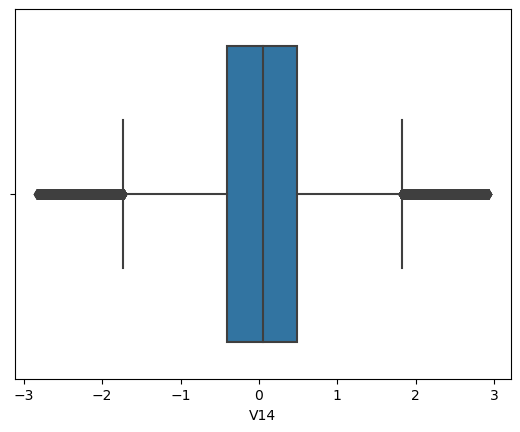

In [4]:
V1_median = df['V14'].median()
# Define a threshold for outliers (for example, anything more than 3 standard deviations from the median)
outlier_threshold = 3 * df['V14'].std()
                                                                                                   #handling outliers 
# Replace outliers with the median
df['V14'] = df['V14'].apply(lambda x: V1_median if abs(x - V1_median) > outlier_threshold else x)

sns.boxplot(df['V14'])

C:\ProgramData\anaconda3\ram\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='V14', ylabel='Density'>

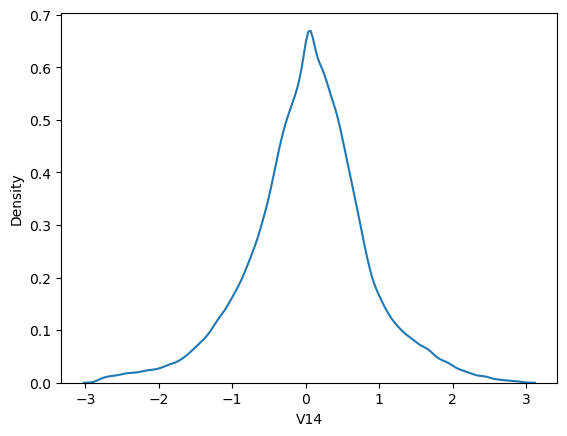

In [7]:
sns.distplot(df['V14'], hist=False)


C:\ProgramData\anaconda3\ram\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='V15'>

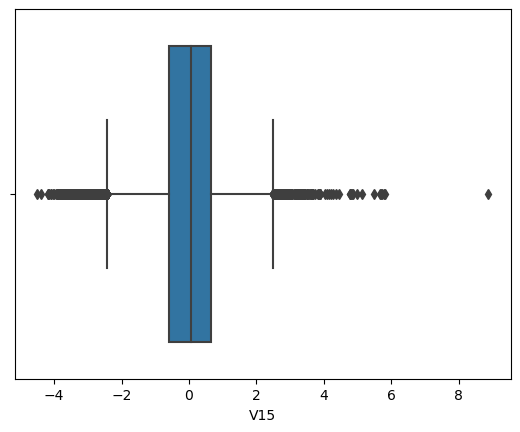

In [67]:
sns.boxplot(df['V15'])

In [68]:
def find_outliers(df, V15):
    q1 = df['V15'].quantile(0.25)
    q3 = df['V15'].quantile(0.75)
    iqr = q3 - q1
    lower_tail = q1 - 1.5 * iqr
    upper_tail = q3 + 1.5 * iqr
    outliers = df[(df['V15'] < lower_tail) | (df['V15'] > upper_tail)]
    return outliers

# Example usage:
outliers = find_outliers(df, "V15")
outliers

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
180,117.0,0.805682,-0.220451,2.371310,4.075817,-0.844073,2.546394,-1.435114,0.942048,0.330468,...,0.185844,0.916783,-0.075911,-0.243420,0.246029,0.283515,0.113704,0.031697,37.89,0
218,144.0,-1.032940,0.680608,1.402550,-0.529928,0.869578,1.903301,0.033240,-0.237815,0.844582,...,0.411651,-0.941007,-0.157833,-1.735297,-0.026033,-0.814974,0.094762,0.126906,15.36,0
238,158.0,-0.159985,-0.611633,2.081419,-1.048128,-1.083456,0.254357,-0.782937,0.264002,0.404509,...,-0.365404,-0.127932,0.163176,0.104227,-1.286765,0.747625,0.241777,0.237056,10.00,0
306,221.0,-0.342871,-0.199546,1.976353,-0.003495,-1.170366,0.883501,-0.151879,0.160106,0.137973,...,-0.313443,0.086207,0.109600,-0.098951,-0.943009,-0.618657,0.253306,0.240271,99.82,0
370,270.0,-1.356935,0.033724,1.874195,-1.469102,-3.125909,1.677056,-4.925568,-7.494658,-1.278470,...,-4.134608,0.864378,0.153499,0.669049,1.108159,-0.120671,0.043393,0.237636,52.95,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284534,172536.0,-0.049074,-0.032507,-0.393289,-1.161604,0.053972,0.965679,-0.261672,0.746428,-0.641100,...,-0.649006,-1.387783,0.144526,-0.543847,-0.346684,0.055995,-0.115062,-0.078724,37.60,0
284542,172543.0,-0.909722,0.577334,-0.610814,3.223744,-2.216835,2.656914,3.166607,0.099503,-1.175961,...,0.287250,1.039311,0.286808,0.531633,0.263987,0.221902,0.053983,-0.229425,707.21,0
284569,172566.0,-0.816705,1.727098,0.069624,2.531436,1.898396,-0.107567,1.746244,-0.358109,-2.417862,...,0.270867,0.778252,-0.499873,-0.285494,0.121381,0.056686,-0.246874,0.140924,35.74,0
284641,172632.0,-1.555915,-0.723804,1.283951,0.329868,0.378464,-0.563840,-1.198251,0.598514,-0.132877,...,0.345741,0.503472,-0.337241,0.795822,0.076045,1.431423,-0.041841,-0.215950,0.01,0


C:\ProgramData\anaconda3\ram\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='V15'>

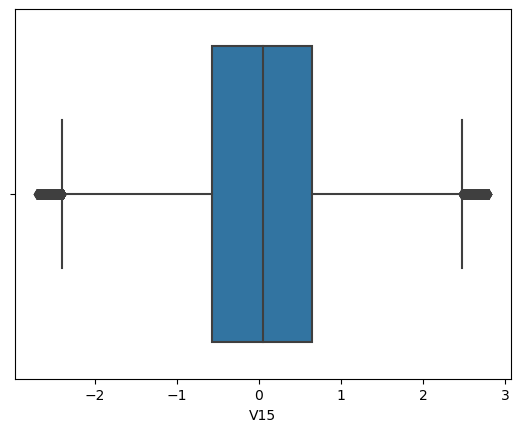

In [8]:
V1_median = df['V15'].median()
# Define a threshold for outliers (for example, anything more than 3 standard deviations from the median)
outlier_threshold = 3 * df['V15'].std()
                                                                                                   #handling outliers 
# Replace outliers with the median
df['V15'] = df['V15'].apply(lambda x: V1_median if abs(x - V1_median) > outlier_threshold else x)

sns.boxplot(df['V15'])

<AxesSubplot:xlabel='V15', ylabel='Density'>

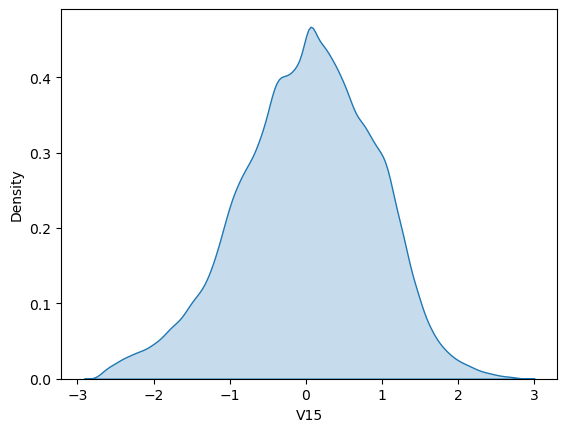

In [9]:
sns.kdeplot(df['V15'], shade=True)

C:\ProgramData\anaconda3\ram\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='V16'>

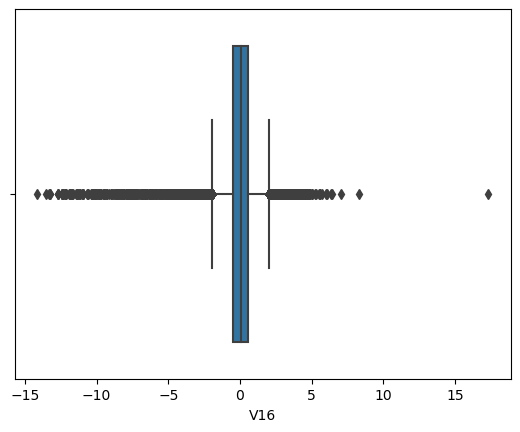

In [69]:
sns.boxplot(df['V16'])

In [70]:
def find_outliers(df, V16):
    q1 = df['V16'].quantile(0.25)
    q3 = df['V16'].quantile(0.75)
    iqr = q3 - q1
    lower_tail = q1 - 1.5 * iqr
    upper_tail = q3 + 1.5 * iqr
    outliers = df[(df['V16'] < lower_tail) | (df['V16'] > upper_tail)]
    return outliers

# Example usage:
outliers = find_outliers(df, "V16")
outliers

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
20,16.0,0.694885,-1.361819,1.029221,0.834159,-1.191209,1.309109,-0.878586,0.445290,-0.446196,...,-0.295583,-0.571955,-0.050881,-0.304215,0.072001,-0.422234,0.086553,0.063499,231.71,0
83,53.0,-1.198968,-1.474100,1.840326,-4.515824,0.327567,-0.174469,0.959726,-1.026456,1.700435,...,-0.453169,0.334614,-0.364541,-0.310186,-0.302599,-1.243924,-1.123457,-0.734351,89.17,0
171,110.0,-1.276830,-0.903557,1.477105,-2.582626,0.635981,-0.866537,1.138067,-0.924605,-0.221504,...,-0.482119,-0.182518,-0.614101,0.037650,0.793080,-0.724708,-0.616486,-0.485985,110.40,0
172,110.0,-0.591933,0.111273,0.699126,-1.536074,1.193208,0.648896,0.796706,0.016904,0.789664,...,0.205964,1.216195,0.093396,-0.900310,-0.423966,-0.607857,0.017705,-0.076746,13.95,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284567,172564.0,1.798595,-1.275680,-2.898197,-0.856260,0.152041,-1.279133,0.829545,-0.686897,-1.155192,...,0.022389,0.108803,-0.265672,0.732954,0.307565,1.587784,-0.217270,-0.050993,265.66,0
284576,172573.0,-2.311453,3.064077,-0.725051,2.166320,1.091353,-0.661393,0.944814,0.528365,-1.533261,...,-0.234181,-1.050250,0.003889,-0.275984,-0.263322,-0.680537,-0.803180,0.033370,7.78,0
284605,172595.0,-0.699032,0.548322,-0.990099,0.401974,0.139656,-0.988125,1.686280,-0.159125,-2.595301,...,0.189057,0.683924,-0.050018,-0.017618,0.661579,-0.040537,-0.042537,0.062065,187.00,0
284634,172627.0,-0.071308,-0.505124,-2.550317,-4.422745,2.078401,2.710189,-0.515071,1.087521,0.106303,...,0.249488,1.172163,0.183493,0.743429,-1.508628,-0.345090,0.141739,0.271248,15.13,0


<AxesSubplot:xlabel='V16', ylabel='Density'>

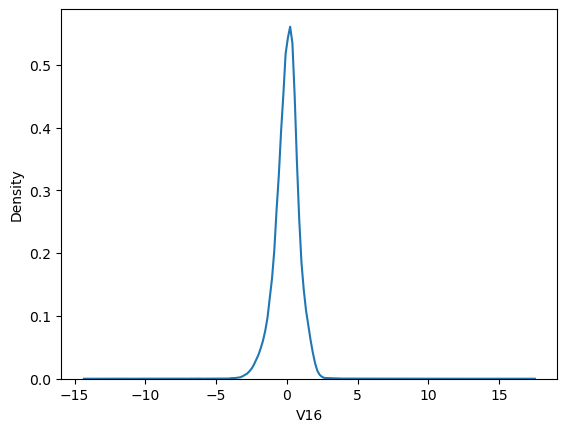

In [10]:
sns.kdeplot(df['V16'])

C:\ProgramData\anaconda3\ram\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='V17'>

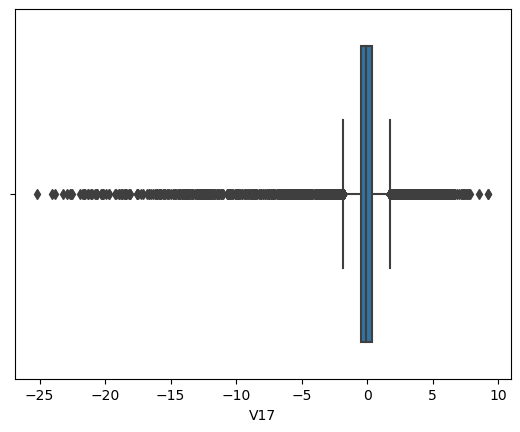

In [71]:
sns.boxplot(df['V17'])

In [72]:
def find_outliers(df, V17):
    q1 = df['V17'].quantile(0.25)
    q3 = df['V17'].quantile(0.75)
    iqr = q3 - q1
    lower_tail = q1 - 1.5 * iqr
    upper_tail = q3 + 1.5 * iqr
    outliers = df[(df['V17'] < lower_tail) | (df['V17'] > upper_tail)]
    return outliers

# Example usage:
outliers = find_outliers(df, "V17")
outliers

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
82,52.0,-3.005237,2.600138,1.483691,-2.418473,0.306326,-0.824575,2.065426,-1.829347,4.009259,...,-0.852309,-0.181268,-0.163747,0.515821,0.136318,0.460054,-0.251259,-1.105751,1.46,0
102,69.0,0.298503,2.142722,-1.542143,1.561332,0.938108,-2.145673,1.405569,-0.778459,0.328636,...,-0.290987,-0.000235,0.092174,0.586205,-0.397314,-0.480949,0.251145,-0.242279,0.78,0
108,73.0,1.162281,1.248178,-1.581317,1.475024,1.138357,-1.020373,0.638387,-0.136762,-0.805505,...,-0.124012,-0.227150,-0.199185,-0.289757,0.776244,-0.283950,0.056747,0.084706,1.00,0
119,77.0,-1.165722,1.485337,0.156418,0.924378,0.131746,0.996965,-0.167117,1.262617,-0.584844,...,0.314752,1.046648,0.156404,-0.628123,-0.702367,-0.224025,0.145425,0.116398,11.83,0
134,83.0,-1.897331,0.955626,0.052543,1.276656,-3.323084,3.229911,1.029631,1.515607,-0.059627,...,0.128416,0.776078,0.477537,-0.608981,-1.120892,-0.413851,0.061399,-0.187964,552.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284633,172625.0,-1.656560,-0.303334,-1.090303,0.908557,-0.014432,-0.783958,1.664815,0.163085,-0.401611,...,0.242880,-0.111603,0.625198,-0.287188,0.153288,-0.148358,-0.057845,0.042227,387.92,0
284638,172629.0,-1.691097,-0.066182,-0.746594,-0.496544,0.867330,-1.118658,2.945484,-0.510813,-1.083929,...,0.162968,-0.292177,0.422693,-0.209257,1.071036,0.669654,-0.388434,-0.099326,430.00,0
284719,172710.0,-1.277262,1.220425,0.242496,-0.569520,0.279860,1.338384,0.850880,-1.294627,0.187376,...,1.302757,-0.836415,-0.073722,-1.206612,0.429807,0.239488,0.246824,0.029778,157.04,0
284782,172767.0,-0.268061,2.540315,-1.400915,4.846661,0.639105,0.186479,-0.045911,0.936448,-2.419986,...,-0.263889,-0.857904,0.235172,-0.681794,-0.668894,0.044657,-0.066751,-0.072447,12.82,0


C:\ProgramData\anaconda3\ram\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='V17'>

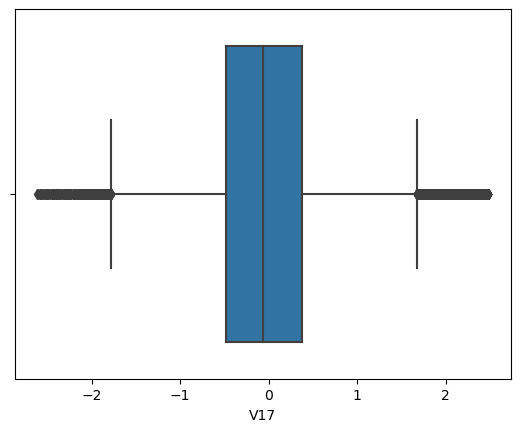

In [11]:
V1_median = df['V17'].median()
# Define a threshold for outliers (for example, anything more than 3 standard deviations from the median)
outlier_threshold = 3 * df['V17'].std()
                                                                                                   #handling outliers 
# Replace outliers with the median
df['V17'] = df['V17'].apply(lambda x: V1_median if abs(x - V1_median) > outlier_threshold else x)

sns.boxplot(df['V17'])

C:\ProgramData\anaconda3\ram\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='V17'>

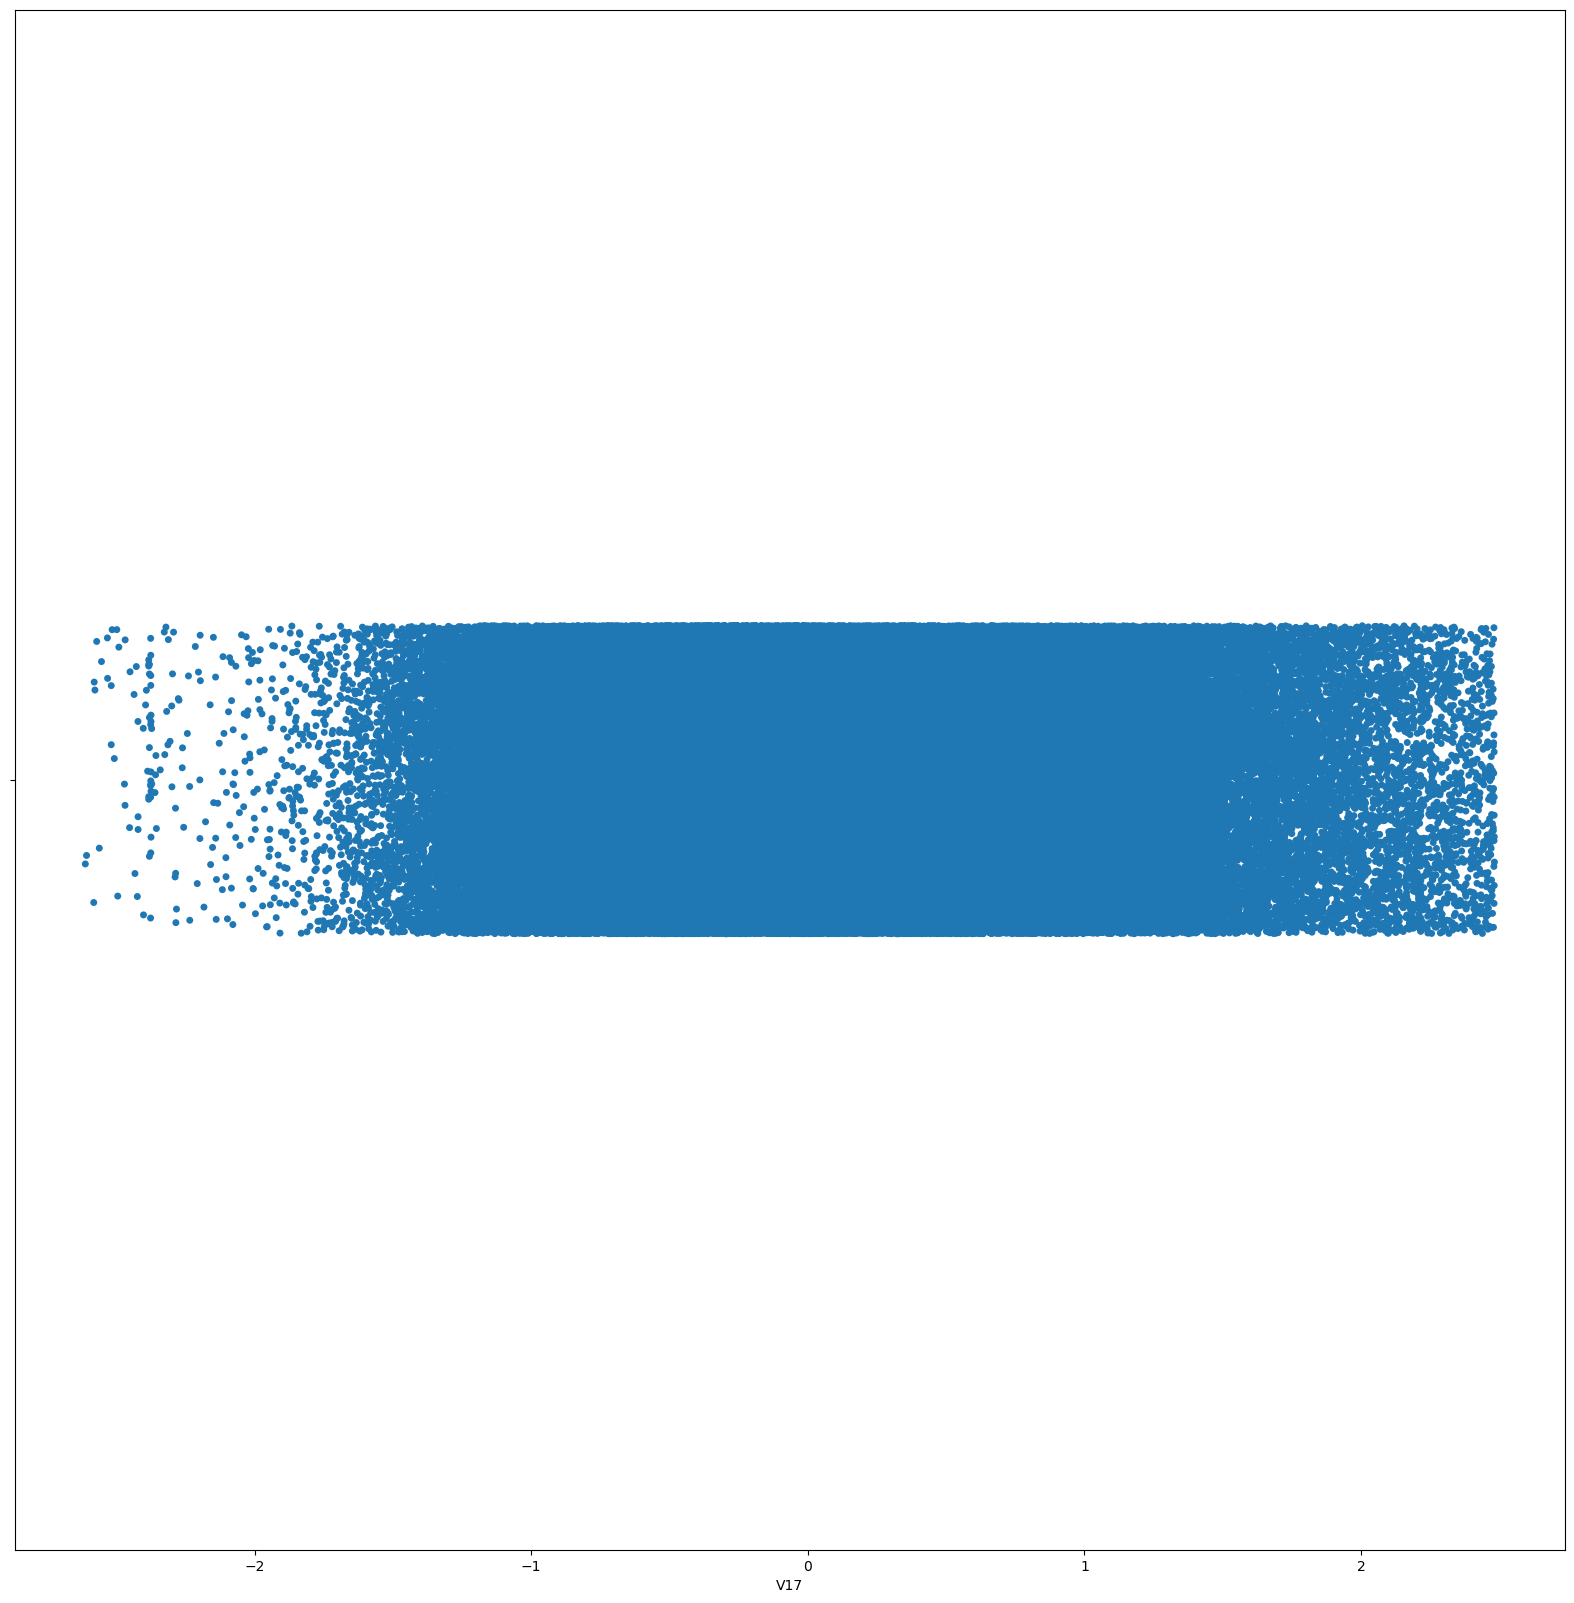

In [12]:
plt.figure(figsize=(20,20))
sns.stripplot(df['V17'])

C:\ProgramData\anaconda3\ram\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='V18'>

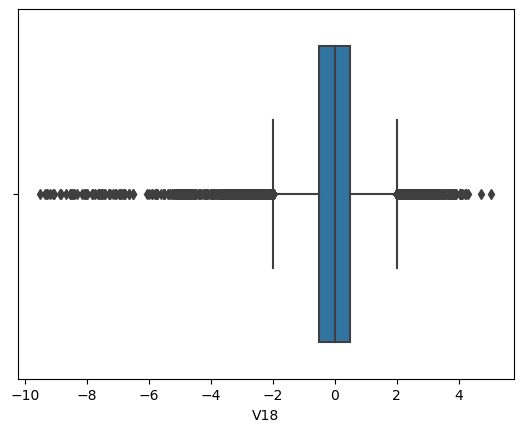

In [73]:
sns.boxplot(df['V18'])

In [74]:
def find_outliers(df, V18):
    q1 = df['V18'].quantile(0.25)
    q3 = df['V18'].quantile(0.75)
    iqr = q3 - q1
    lower_tail = q1 - 1.5 * iqr
    upper_tail = q3 + 1.5 * iqr
    outliers = df[(df['V18'] < lower_tail) | (df['V18'] > upper_tail)]
    return outliers

# Example usage:
outliers = find_outliers(df, "V18")
outliers

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
38,29.0,0.996370,-0.122589,0.546819,0.706580,0.134560,1.156995,-0.294561,0.407429,0.337863,...,-0.076302,0.108867,0.162231,-0.575624,0.109795,0.373813,0.050552,0.005106,20.53,0
68,44.0,0.927060,-0.323684,0.387585,0.544474,0.246787,1.650358,-0.427576,0.615371,0.226278,...,-0.040513,0.079359,0.096632,-0.992569,0.085096,0.377447,0.036096,-0.005960,45.71,0
96,64.0,0.959602,0.370711,0.888613,2.343244,0.352491,1.365515,-0.277771,0.516053,-0.700929,...,-0.155547,-0.403239,0.356504,-0.696881,-0.198718,-0.220268,0.068546,0.020797,7.55,0
112,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
113,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284535,172536.0,-1.066944,0.169090,1.638528,-2.191481,-0.364375,0.823917,-0.549590,0.733370,-1.248903,...,-0.286808,-0.540809,-0.337469,-1.379929,0.382657,0.589708,-0.107753,-0.033623,31.90,0
284536,172539.0,-5.823560,0.333130,-0.732746,0.770116,-3.785871,2.124706,-2.272833,2.896201,0.552732,...,-0.384073,-0.204040,-1.113031,0.258388,0.732836,-0.231069,-0.049823,-0.019875,150.00,0
284625,172619.0,-0.446997,0.975630,-0.173813,-0.719547,0.804594,0.374565,0.416592,0.643698,-0.302810,...,-0.124779,-0.179656,0.201957,-1.025398,-0.674657,0.238731,0.179984,0.019549,1.98,0
284731,172721.0,-0.947373,-0.059861,1.537605,0.117118,-0.315440,0.505595,0.342234,0.244829,-1.557720,...,-0.239290,-0.367110,-0.034898,-0.561550,0.591367,-0.340983,0.310727,0.140940,138.00,0


C:\ProgramData\anaconda3\ram\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='V18'>

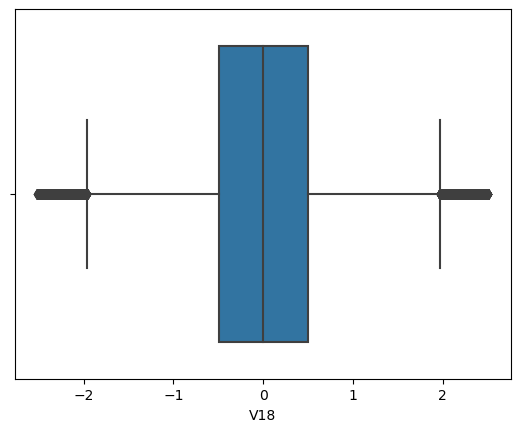

In [13]:
V1_median = df['V18'].median()
# Define a threshold for outliers (for example, anything more than 3 standard deviations from the median)
outlier_threshold = 3 * df['V18'].std()
                                                                                                   #handling outliers 
# Replace outliers with the median
df['V18'] = df['V18'].apply(lambda x: V1_median if abs(x - V1_median) > outlier_threshold else x)

sns.boxplot(df['V18'])

<AxesSubplot:xlabel='V18'>

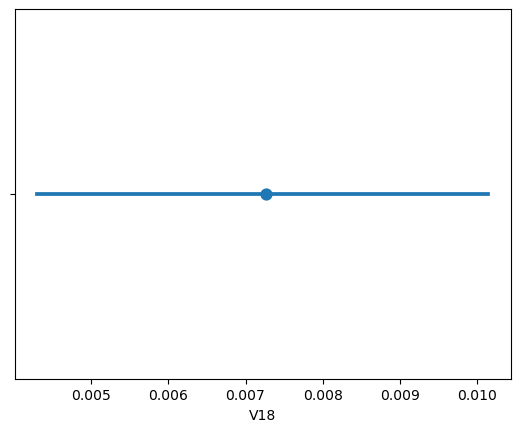

In [18]:
sns.pointplot(df['V18'])

C:\ProgramData\anaconda3\ram\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='V19'>

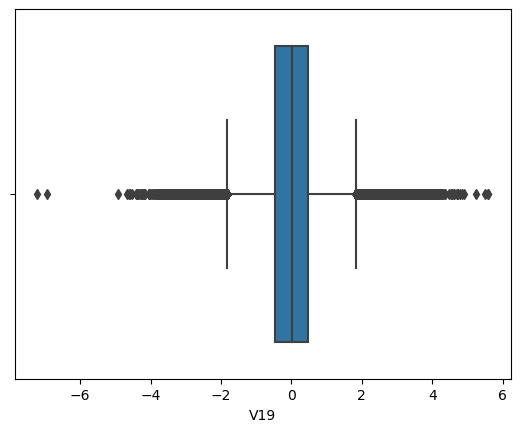

In [75]:
sns.boxplot(df['V19'])

In [4]:
def find_outliers(df, V19):
    q1 = df['V19'].quantile(0.25)
    q3 = df['V19'].quantile(0.75)
    iqr = q3 - q1
    lower_tail = q1 - 1.5 * iqr
    upper_tail = q3 + 1.5 * iqr
    outliers = df[(df['V19'] < lower_tail) | (df['V19'] > upper_tail)]
    return outliers

# Example usage:
outliers = find_outliers(df, "V19")
outliers

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
14,12.0,-2.791855,-0.327771,1.641750,1.767473,-0.136588,0.807596,-0.422911,-1.907107,0.755713,...,1.151663,0.222182,1.020586,0.028317,-0.232746,-0.235557,-0.164778,-0.030154,58.80,0
21,17.0,0.962496,0.328461,-0.171479,2.109204,1.129566,1.696038,0.107712,0.521502,-1.191311,...,0.143997,0.402492,-0.048508,-1.371866,0.390814,0.199964,0.016371,-0.014605,34.09,0
23,18.0,0.247491,0.277666,1.185471,-0.092603,-1.314394,-0.150116,-0.946365,-1.617935,1.544071,...,1.650180,0.200454,-0.185353,0.423073,0.820591,-0.227632,0.336634,0.250475,22.75,0
69,46.0,-1.923213,-0.870482,2.320170,1.988776,0.417091,-0.380014,0.472139,-0.557333,-0.649079,...,-0.686488,-0.779268,1.086055,0.518863,-0.363712,3.065576,-0.589022,-0.396110,35.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284693,172688.0,-0.973245,0.365459,0.544881,-0.018750,0.823960,-1.830569,1.632718,-0.263931,-0.343031,...,0.221751,0.353157,0.037998,0.798246,0.261837,-0.820848,0.052709,0.161392,89.90,0
284725,172712.0,-0.364673,1.369103,-0.728575,0.942156,0.690695,-0.142101,0.279193,0.304228,-0.563470,...,0.263263,0.700805,-0.428007,-0.033279,0.045895,0.345064,-0.053366,0.089564,10.56,0
284766,172756.0,-0.564412,-0.340899,0.001107,-1.775612,0.116635,1.116266,-0.211710,0.823119,-1.024449,...,-0.146040,-0.181247,0.354040,-0.371682,-0.351548,0.511621,-0.168182,-0.155795,95.63,0
284798,172782.0,0.219529,0.881246,-0.635891,0.960928,-0.152971,-1.014307,0.427126,0.121340,-0.285670,...,0.099936,0.337120,0.251791,0.057688,-1.508368,0.144023,0.181205,0.215243,24.05,0


C:\ProgramData\anaconda3\ram\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='V19'>

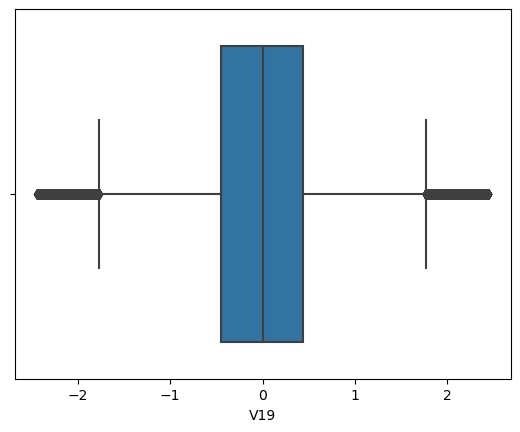

In [5]:
V1_median = df['V19'].median()
# Define a threshold for outliers (for example, anything more than 3 standard deviations from the median)
outlier_threshold = 3 * df['V19'].std()
                                                                                                   #handling outliers 
# Replace outliers with the median
df['V19'] = df['V19'].apply(lambda x: V1_median if abs(x - V1_median) > outlier_threshold else x)

sns.boxplot(df['V19'])

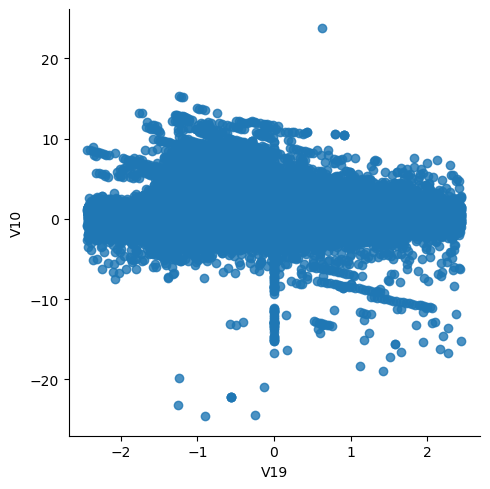

In [8]:
sns.lmplot(data=df,x = "V19", y = "V10")

C:\ProgramData\anaconda3\ram\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='V20'>

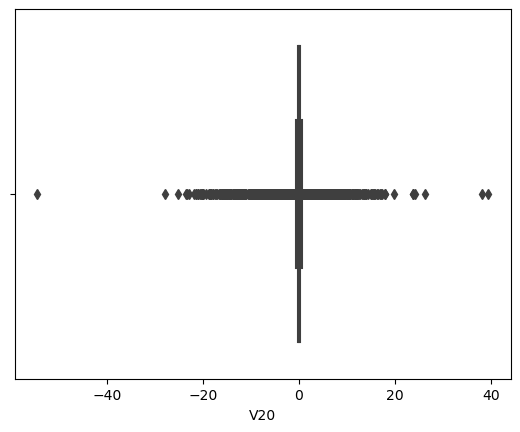

In [7]:
sns.boxplot(df['V20'])

In [78]:
def find_outliers(df, V20):
    q1 = df['V20'].quantile(0.25)
    q3 = df['V20'].quantile(0.75)
    iqr = q3 - q1
    lower_tail = q1 - 1.5 * iqr
    upper_tail = q3 + 1.5 * iqr
    outliers = df[(df['V20'] < lower_tail) | (df['V20'] > upper_tail)]
    return outliers

# Example usage:
outliers = find_outliers(df, "V20")
outliers

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
14,12.0,-2.791855,-0.327771,1.641750,1.767473,-0.136588,0.807596,-0.422911,-1.907107,0.755713,...,1.151663,0.222182,1.020586,0.028317,-0.232746,-0.235557,-0.164778,-0.030154,58.80,0
18,14.0,-5.401258,-5.450148,1.186305,1.736239,3.049106,-1.763406,-1.559738,0.160842,1.233090,...,-0.503600,0.984460,2.458589,0.042119,-0.481631,-0.621272,0.392053,0.949594,46.80,0
74,48.0,-1.793406,1.854604,0.979514,1.112262,-0.206403,-0.199546,0.616642,0.064180,0.690272,...,-0.180723,0.235138,-0.091442,0.417654,0.122734,-0.232985,0.811880,0.618568,26.72,0
82,52.0,-3.005237,2.600138,1.483691,-2.418473,0.306326,-0.824575,2.065426,-1.829347,4.009259,...,-0.852309,-0.181268,-0.163747,0.515821,0.136318,0.460054,-0.251259,-1.105751,1.46,0
83,53.0,-1.198968,-1.474100,1.840326,-4.515824,0.327567,-0.174469,0.959726,-1.026456,1.700435,...,-0.453169,0.334614,-0.364541,-0.310186,-0.302599,-1.243924,-1.123457,-0.734351,89.17,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284765,172754.0,-2.433477,2.859978,-1.714267,-1.964427,1.070515,-1.098247,1.814726,-0.508294,1.980996,...,-0.192003,0.781494,-0.167831,0.682687,0.110603,-0.020888,0.752567,-0.029560,0.77,0
284772,172760.0,-6.713826,2.369104,-3.534768,-0.368259,-1.721030,-1.322808,-0.190876,0.891149,2.068476,...,0.131247,0.994246,-0.002140,-0.072979,-0.167159,-0.387271,-2.616341,0.474584,19.59,0
284776,172762.0,-1.143909,1.780421,-0.454124,-0.814393,0.514689,-0.926634,1.196374,-0.349255,0.863877,...,0.173511,1.491648,-0.156954,0.053810,-0.630124,-0.301970,0.425852,-0.109068,7.22,0
284795,172778.0,-12.516732,10.187818,-8.476671,-2.510473,-4.586669,-1.394465,-3.632516,5.498583,4.893089,...,-0.944759,-1.565026,0.890675,-1.253276,1.786717,0.320763,2.090712,1.232864,9.87,0


C:\ProgramData\anaconda3\ram\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='V20'>

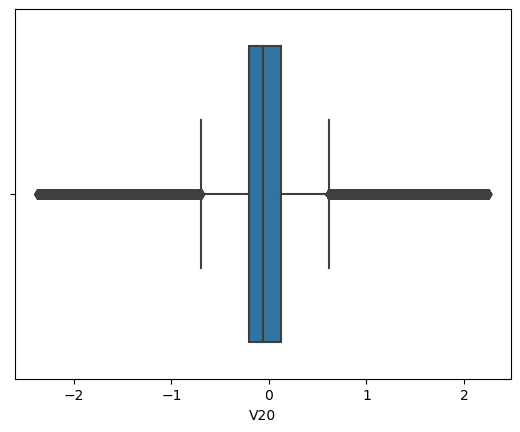

In [9]:
V1_median = df['V20'].median()
# Define a threshold for outliers (for example, anything more than 3 standard deviations from the median)
outlier_threshold = 3 * df['V20'].std()
                                                                                                   #handling outliers 
# Replace outliers with the median
df['V20'] = df['V20'].apply(lambda x: V1_median if abs(x - V1_median) > outlier_threshold else x)

sns.boxplot(df['V20'])

<AxesSubplot:xlabel='V20', ylabel='Count'>

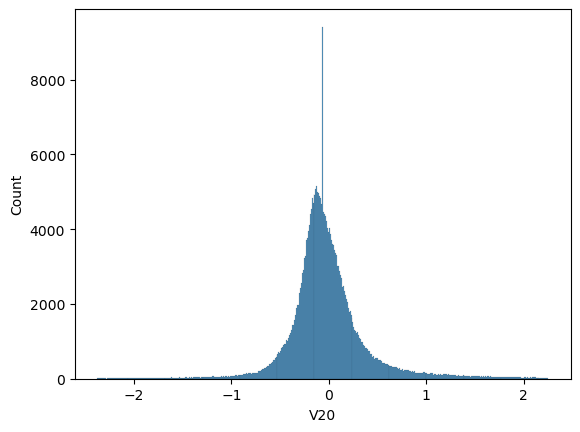

In [10]:
sns.histplot(df['V20'])

C:\ProgramData\anaconda3\ram\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='V21'>

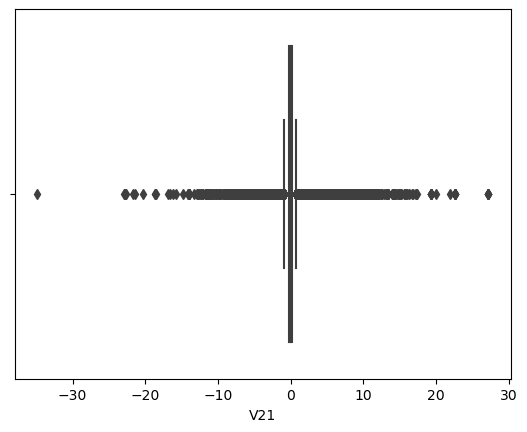

In [79]:
sns.boxplot(df['V21'])

In [80]:
def find_outliers(df, V21):
    q1 = df['V21'].quantile(0.25)
    q3 = df['V21'].quantile(0.75)
    iqr = q3 - q1
    lower_tail = q1 - 1.5 * iqr
    upper_tail = q3 + 1.5 * iqr
    outliers = df[(df['V21'] < lower_tail) | (df['V21'] > upper_tail)]
    return outliers

# Example usage:
outliers = find_outliers(df, "V21")
outliers

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
14,12.0,-2.791855,-0.327771,1.641750,1.767473,-0.136588,0.807596,-0.422911,-1.907107,0.755713,...,1.151663,0.222182,1.020586,0.028317,-0.232746,-0.235557,-0.164778,-0.030154,58.80,0
23,18.0,0.247491,0.277666,1.185471,-0.092603,-1.314394,-0.150116,-0.946365,-1.617935,1.544071,...,1.650180,0.200454,-0.185353,0.423073,0.820591,-0.227632,0.336634,0.250475,22.75,0
51,36.0,-1.004929,-0.985978,-0.038039,3.710061,-6.631951,5.122103,4.371691,-2.006868,-0.278736,...,1.393406,-0.381671,0.969719,0.019445,0.570923,0.333278,0.857373,-0.075538,1402.95,0
82,52.0,-3.005237,2.600138,1.483691,-2.418473,0.306326,-0.824575,2.065426,-1.829347,4.009259,...,-0.852309,-0.181268,-0.163747,0.515821,0.136318,0.460054,-0.251259,-1.105751,1.46,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284735,172727.0,-1.661169,-0.565425,0.294268,-1.549156,-2.301359,2.365956,-0.248881,-0.857361,0.137784,...,1.432397,-0.257828,-0.072471,-1.035804,-0.437889,-0.238543,0.365302,-0.448621,381.05,0
284742,172734.0,-1.248847,2.279478,-1.144824,-0.263061,0.070912,-0.323414,-1.454139,-5.069379,-0.827733,...,-2.704489,0.261945,0.490272,-0.112758,-0.453183,-0.694933,-0.106693,0.082714,9.99,0
284786,172768.0,-2.076175,2.142238,-2.522704,-1.888063,1.982785,3.732950,-1.217430,-0.536644,0.272867,...,2.016666,-1.588269,0.588482,0.632444,-0.201064,0.199251,0.438657,0.172923,8.95,0
284789,172770.0,-0.446951,1.302212,-0.168583,0.981577,0.578957,-0.605641,1.253430,-1.042610,-0.417116,...,0.851800,0.305268,-0.148093,-0.038712,0.010209,-0.362666,0.503092,0.229921,60.50,0


C:\ProgramData\anaconda3\ram\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='V21'>

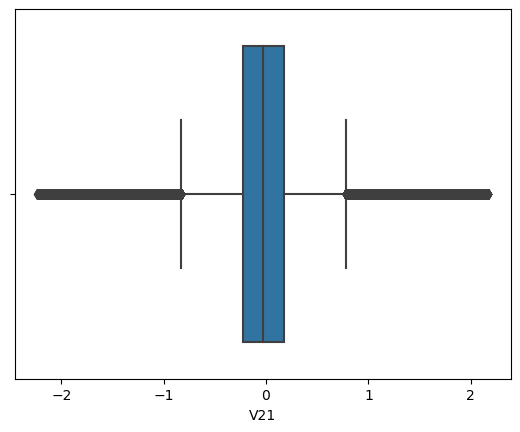

In [11]:
V1_median = df['V21'].median()
# Define a threshold for outliers (for example, anything more than 3 standard deviations from the median)
outlier_threshold = 3 * df['V21'].std()
                                                                                                   #handling outliers 
# Replace outliers with the median
df['V21'] = df['V21'].apply(lambda x: V1_median if abs(x - V1_median) > outlier_threshold else x)

sns.boxplot(df['V21'])

<AxesSubplot:xlabel='V21', ylabel='Density'>

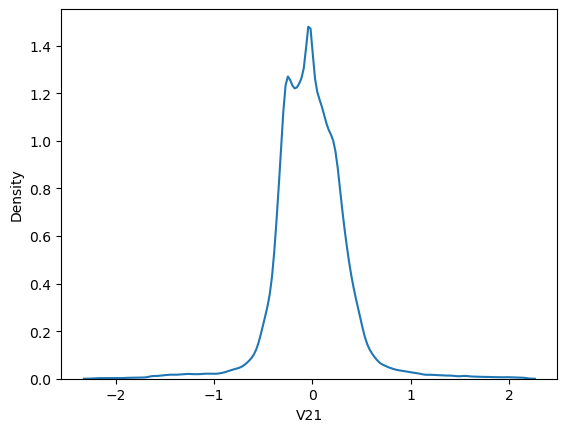

In [12]:
sns.kdeplot(df['V21'])

C:\ProgramData\anaconda3\ram\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='V22'>

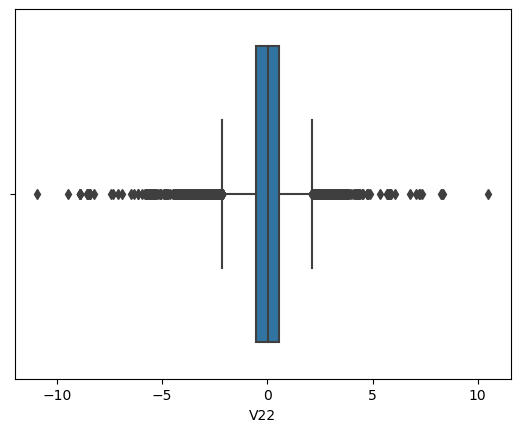

In [81]:
sns.boxplot(df['V22'])

In [4]:
def find_outliers(df, V22):
    q1 = df['V22'].quantile(0.25)
    q3 = df['V22'].quantile(0.75)
    iqr = q3 - q1
    lower_tail = q1 - 1.5 * iqr
    upper_tail = q3 + 1.5 * iqr
    outliers = df[(df['V22'] < lower_tail) | (df['V22'] > upper_tail)]
    return outliers

# Example usage:
outliers = find_outliers(df, "V22")
outliers

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
160,100.0,-0.378602,0.274579,-0.129488,-2.682799,-0.731375,-0.226354,-0.006949,-2.778983,-0.233232,...,1.426146,-2.776923,-0.466756,-0.714697,1.136720,-0.981993,0.356781,0.148444,182.95,0
164,103.0,-6.093248,-12.114213,-5.694973,3.294389,-1.413792,4.776000,4.808426,-0.228197,-0.525896,...,2.228823,-2.264037,-3.553381,1.215279,-0.406073,-0.653384,-0.711222,0.672900,3828.04,0
417,302.0,-0.986171,1.732934,0.857587,0.178950,-0.794223,-0.088469,-1.266790,-4.922224,0.010309,...,4.332858,-2.331390,0.568103,0.638796,0.867788,0.181051,0.225638,0.179027,9.99,0
2061,1594.0,-2.027577,1.869594,-0.591977,-2.320777,-0.908498,0.614715,-2.373287,-7.921857,1.390464,...,7.667920,-2.491575,0.371678,0.143700,0.773518,0.019107,0.543046,0.258536,80.00,0
2114,1628.0,-2.296229,2.193061,0.327360,-0.729287,-0.699595,1.575747,-2.494944,-7.752840,0.491260,...,7.430848,-3.138177,0.400361,-0.054394,0.882662,0.481744,0.473539,0.221455,79.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282578,170999.0,-1.357021,3.112070,-1.269994,3.202090,0.975552,1.826012,0.283250,-4.908847,-1.829840,...,4.000479,-3.059282,-0.233622,-0.370752,1.850745,0.159283,0.420775,0.159451,208.18,0
282696,171078.0,-4.490471,4.090733,-3.090451,-0.384403,-2.189889,3.076664,-5.861460,-8.114985,-0.994379,...,-4.602027,2.529704,0.738324,-0.256670,-0.120133,0.635581,-1.039729,-0.104868,113.90,0
282859,171198.0,-1.085529,1.892822,-1.202955,-0.963261,1.003113,0.712836,-0.578986,-3.776005,0.207177,...,3.467070,-2.236875,0.565063,-0.346638,-0.278306,0.177360,0.388024,0.103048,3.99,0
283183,171427.0,-4.009100,2.933436,-0.152296,-2.698281,-1.193810,1.623453,-3.523118,-8.545229,0.038291,...,4.174999,-2.833353,1.286831,0.462382,-0.324520,0.860959,0.424570,0.199452,4.00,0


C:\ProgramData\anaconda3\ram\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='V22'>

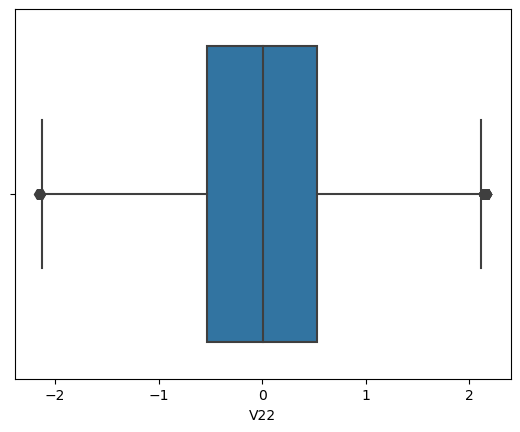

In [5]:
V1_median = df['V22'].median()
# Define a threshold for outliers (for example, anything more than 3 standard deviations from the median)
outlier_threshold = 3 * df['V22'].std()
                                                                                                   #handling outliers 
# Replace outliers with the median
df['V22'] = df['V22'].apply(lambda x: V1_median if abs(x - V1_median) > outlier_threshold else x)

sns.boxplot(df['V22'])

C:\ProgramData\anaconda3\ram\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='V22', ylabel='Density'>

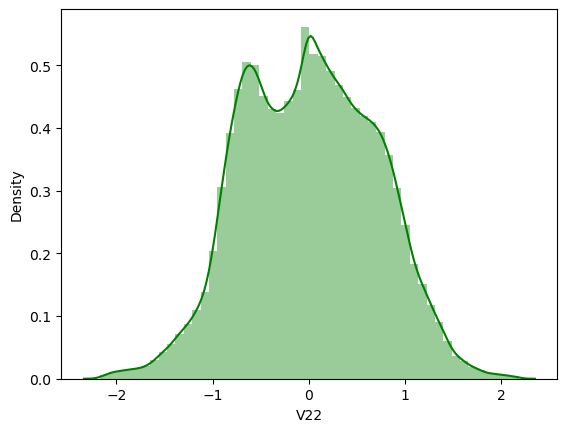

In [6]:
sns.distplot(df['V22'], kde = True, color = "g")

C:\ProgramData\anaconda3\ram\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='V23'>

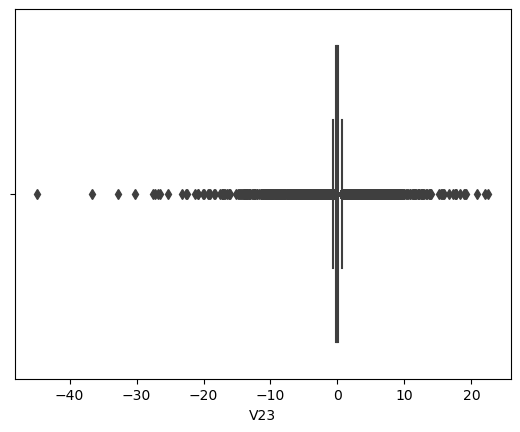

In [7]:
sns.boxplot(df['V23'])

In [8]:
def find_outliers(df, V23):
    q1 = df['V23'].quantile(0.25)
    q3 = df['V23'].quantile(0.75)
    iqr = q3 - q1
    lower_tail = q1 - 1.5 * iqr
    upper_tail = q3 + 1.5 * iqr
    outliers = df[(df['V23'] < lower_tail) | (df['V23'] > upper_tail)]
    return outliers

# Example usage:
outliers = find_outliers(df, "V23")
outliers

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
14,12.0,-2.791855,-0.327771,1.641750,1.767473,-0.136588,0.807596,-0.422911,-1.907107,0.755713,...,1.151663,0.222182,1.020586,0.028317,-0.232746,-0.235557,-0.164778,-0.030154,58.80,0
18,14.0,-5.401258,-5.450148,1.186305,1.736239,3.049106,-1.763406,-1.559738,0.160842,1.233090,...,-0.503600,0.984460,2.458589,0.042119,-0.481631,-0.621272,0.392053,0.949594,46.80,0
24,22.0,-1.946525,-0.044901,-0.405570,-1.013057,2.941968,2.955053,-0.063063,0.855546,0.049967,...,-0.579526,-0.799229,0.870300,0.983421,0.321201,0.149650,0.707519,0.014600,0.89,0
25,22.0,-2.074295,-0.121482,1.322021,0.410008,0.295198,-0.959537,0.543985,-0.104627,0.475664,...,-0.403639,-0.227404,0.742435,0.398535,0.249212,0.274404,0.359969,0.243232,26.43,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284698,172693.0,-0.857688,0.290945,-2.391448,-0.315457,-0.014455,-1.765595,2.671779,-0.511257,-0.740175,...,0.484050,1.826575,0.862395,0.586089,-1.036145,0.659765,0.436365,0.173492,307.88,0
284712,172704.0,0.470194,-1.619056,-2.258427,4.440719,0.202024,-0.458243,1.970565,-0.665303,-1.630737,...,0.603016,0.104952,-0.716836,0.121688,0.170587,0.082567,-0.218942,0.070955,787.95,0
284716,172708.0,-1.795049,-1.292762,0.599481,-0.944031,0.787336,-0.640908,1.214133,0.058447,-0.211857,...,0.325749,0.015246,0.659969,-0.457112,0.089856,0.013692,-0.093591,0.161537,314.90,0
284795,172778.0,-12.516732,10.187818,-8.476671,-2.510473,-4.586669,-1.394465,-3.632516,5.498583,4.893089,...,-0.944759,-1.565026,0.890675,-1.253276,1.786717,0.320763,2.090712,1.232864,9.87,0


C:\ProgramData\anaconda3\ram\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='V23'>

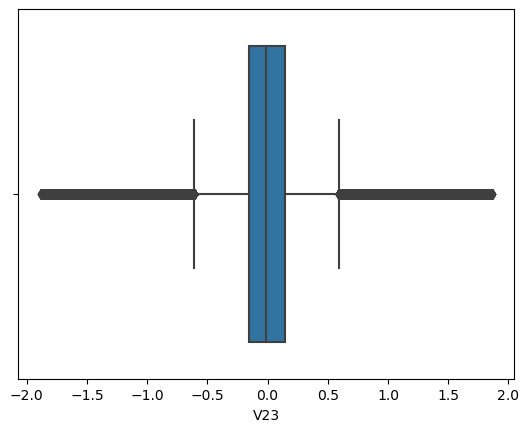

In [10]:
V1_median = df['V23'].median()
# Define a threshold for outliers (for example, anything more than 3 standard deviations from the median)
outlier_threshold = 3 * df['V23'].std()
                                                                                                   #handling outliers 
# Replace outliers with the median
df['V23'] = df['V23'].apply(lambda x: V1_median if abs(x - V1_median) > outlier_threshold else x)

sns.boxplot(df['V23'])

<AxesSubplot:xlabel='V23', ylabel='Density'>

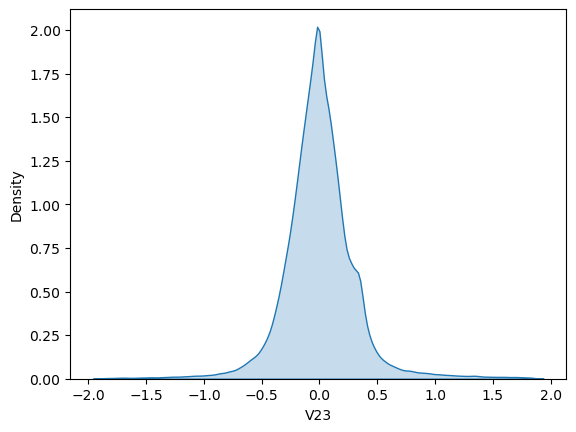

In [13]:
sns.kdeplot(df['V23'] ,fill = True)

C:\ProgramData\anaconda3\ram\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='V24'>

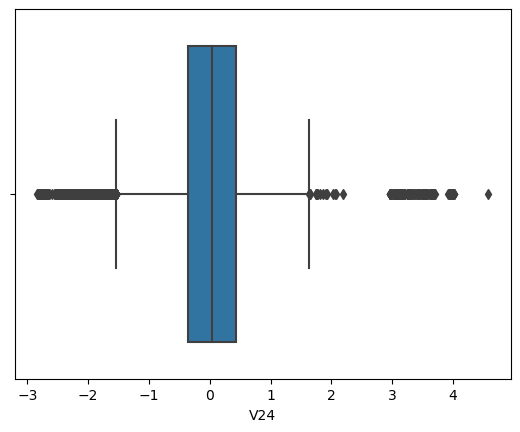

In [85]:
sns.boxplot(df['V24'])

In [86]:
def find_outliers(df, V24):
    q1 = df['V24'].quantile(0.25)
    q3 = df['V24'].quantile(0.75)
    iqr = q3 - q1
    lower_tail = q1 - 1.5 * iqr
    upper_tail = q3 + 1.5 * iqr
    outliers = df[(df['V24'] < lower_tail) | (df['V24'] > upper_tail)]
    return outliers

# Example usage:
outliers = find_outliers(df, "V24")
outliers

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
183,118.0,1.431053,-0.648101,-0.331664,-1.207383,-0.012786,0.704440,-0.732126,0.183139,-0.878334,...,0.112749,0.222296,-0.244591,-1.688158,0.609778,-0.088366,0.010438,-0.014499,20.00,0
218,144.0,-1.032940,0.680608,1.402550,-0.529928,0.869578,1.903301,0.033240,-0.237815,0.844582,...,0.411651,-0.941007,-0.157833,-1.735297,-0.026033,-0.814974,0.094762,0.126906,15.36,0
220,145.0,-2.420413,1.947885,0.553646,0.983069,-0.281518,2.408958,-1.401613,-0.188299,0.675878,...,1.213826,-1.238620,0.006927,-1.724222,0.239603,-0.313703,-0.188281,0.119831,6.00,0
221,145.0,-2.420413,1.947885,0.553646,0.983069,-0.281518,2.408958,-1.401613,-0.188299,0.675878,...,1.213826,-1.238620,0.006927,-1.724222,0.239603,-0.313703,-0.188281,0.119831,6.00,0
222,145.0,-2.419486,1.949346,0.552998,0.982710,-0.284815,2.411200,-1.398537,-0.188922,0.675695,...,1.213390,-1.238354,0.007191,-1.724175,0.239721,-0.313607,-0.187431,0.119472,6.74,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284145,172193.0,1.932277,-0.344858,-1.434519,0.002755,0.714357,0.894282,-0.234825,0.331854,0.471378,...,-0.209075,-0.449686,0.344362,-1.659359,-0.493879,0.313272,-0.032634,-0.089148,3.57,0
284522,172523.0,-0.526583,0.881325,-0.515026,-0.230523,1.663537,0.962273,1.111302,0.332699,-0.436653,...,0.076439,0.418614,-0.104050,-1.584783,-0.163472,-0.154850,0.203031,0.185303,80.44,0
284553,172549.0,2.174499,-1.490272,-1.221715,-1.881751,-0.395973,1.034384,-1.308778,0.274126,-1.512299,...,-0.073865,0.409162,0.219062,-1.638714,-0.316722,-0.049944,0.056322,-0.077890,15.00,0
284565,172563.0,-1.403833,0.750307,1.807602,2.342155,1.408161,2.395871,-0.054309,0.740729,-1.077629,...,0.368872,1.133820,-0.110059,-1.666391,-0.162721,0.166958,-0.227449,0.177852,3.44,0


C:\ProgramData\anaconda3\ram\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='V24'>

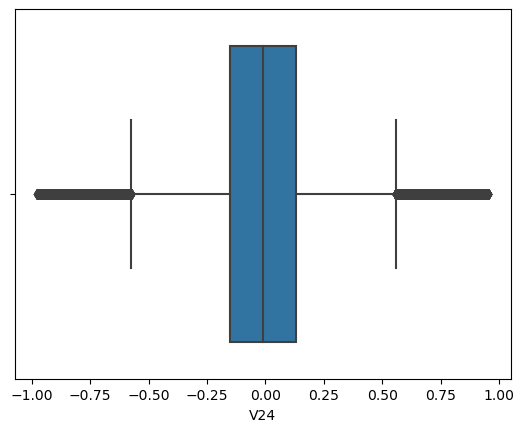

In [14]:
V1_median = df['V24'].median()
# Define a threshold for outliers (for example, anything more than 3 standard deviations from the median)
outlier_threshold = 3 * df['V24'].std()
                                                                                                   #handling outliers 
# Replace outliers with the median
df['V24'] = df['V24'].apply(lambda x: V1_median if abs(x - V1_median) > outlier_threshold else x)

sns.boxplot(df['V24'])

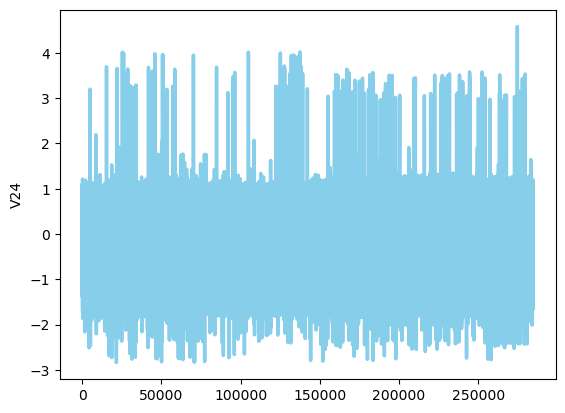

In [4]:
sns.lineplot(data=df['V24'], linewidth=2.5, color='skyblue')
plt.fill_between(df.index, df['V24'], color='skyblue', alpha=0.4)

C:\ProgramData\anaconda3\ram\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='V25'>

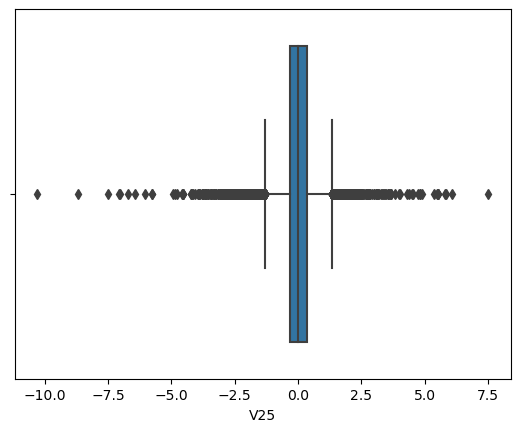

In [87]:
sns.boxplot(df['V25'])

In [88]:
def find_outliers(df, V25):
    q1 = df['V25'].quantile(0.25)
    q3 = df['V25'].quantile(0.75)
    iqr = q3 - q1
    lower_tail = q1 - 1.5 * iqr
    upper_tail = q3 + 1.5 * iqr
    outliers = df[(df['V25'] < lower_tail) | (df['V25'] > upper_tail)]
    return outliers

# Example usage:
outliers = find_outliers(df, "V25")
outliers

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
244,164.0,0.073497,0.551033,0.451890,0.114964,0.822947,0.251480,0.296319,0.139497,-0.123050,...,-0.128758,-0.381932,0.151012,-1.363967,-1.389079,0.075412,0.231750,0.230171,0.99,0
718,541.0,-0.623525,0.176955,2.565715,1.544280,0.109686,0.055218,0.259801,-0.192566,-0.320106,...,0.387800,1.408297,0.019451,0.545551,-1.357580,-0.332164,-0.138540,-0.200151,67.10,0
787,599.0,0.142623,0.615165,1.421547,1.291217,-0.617997,-0.428988,0.678548,-0.367664,0.162607,...,-0.118524,0.073901,0.295627,0.740646,-1.544209,0.133510,-0.001466,0.014813,55.61,0
1329,1040.0,0.141319,0.352612,1.050522,0.549027,-0.207915,-0.032271,0.106785,0.078214,-0.206778,...,-0.070837,-0.028085,0.271167,0.086090,-1.577384,0.835264,0.209991,0.234885,25.00,0
1515,1180.0,-1.504151,1.323300,0.497858,-2.486798,-0.600184,0.649879,-1.705408,-5.556682,2.058496,...,5.398083,-1.410615,0.136399,-0.486985,1.629684,-0.656300,0.404098,0.238732,22.71,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284649,172642.0,-11.946976,9.772660,-8.006237,-2.498596,-4.229520,-1.320039,-3.259766,5.059956,4.870093,...,-0.957977,-1.529035,0.838689,-1.249172,1.714495,0.314623,2.112848,1.234408,10.74,0
284659,172652.0,-2.734350,0.115405,-1.246985,-1.471630,1.558667,-1.552623,1.305007,0.421446,-1.475435,...,0.508751,0.751185,-0.903766,0.897164,1.704416,0.313671,-0.441428,-0.371971,76.00,0
284795,172778.0,-12.516732,10.187818,-8.476671,-2.510473,-4.586669,-1.394465,-3.632516,5.498583,4.893089,...,-0.944759,-1.565026,0.890675,-1.253276,1.786717,0.320763,2.090712,1.232864,9.87,0
284798,172782.0,0.219529,0.881246,-0.635891,0.960928,-0.152971,-1.014307,0.427126,0.121340,-0.285670,...,0.099936,0.337120,0.251791,0.057688,-1.508368,0.144023,0.181205,0.215243,24.05,0


C:\ProgramData\anaconda3\ram\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='V25'>

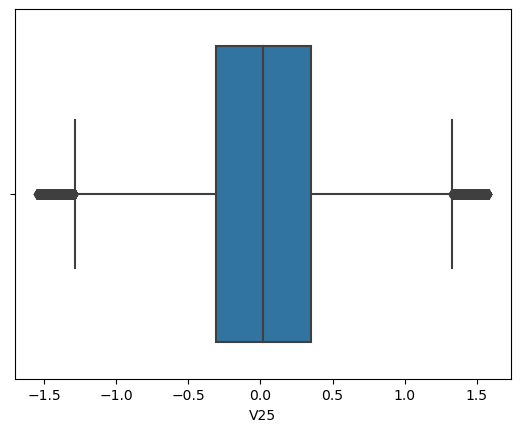

In [5]:
V1_median = df['V25'].median()
# Define a threshold for outliers (for example, anything more than 3 standard deviations from the median)
outlier_threshold = 3 * df['V25'].std()
                                                                                                   #handling outliers 
# Replace outliers with the median
df['V25'] = df['V25'].apply(lambda x: V1_median if abs(x - V1_median) > outlier_threshold else x)

sns.boxplot(df['V25'])

<AxesSubplot:xlabel='V25', ylabel='Count'>

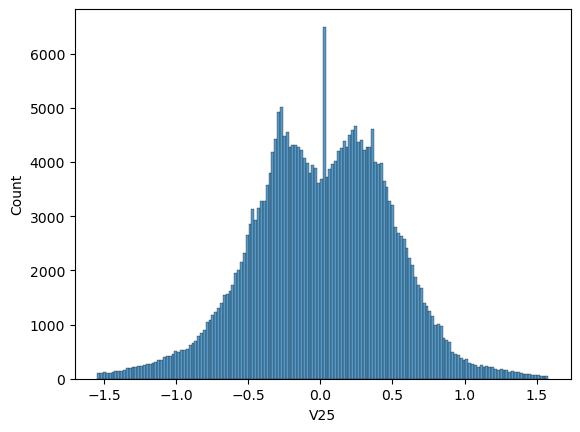

In [8]:
sns.histplot(df['V25'])

C:\ProgramData\anaconda3\ram\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='V26'>

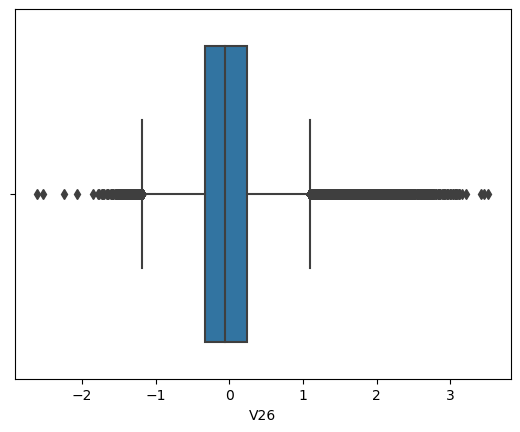

In [89]:
sns.boxplot(df['V26'])

In [90]:
def find_outliers(df, V26):
    q1 = df['V26'].quantile(0.25)
    q3 = df['V26'].quantile(0.75)
    iqr = q3 - q1
    lower_tail = q1 - 1.5 * iqr
    upper_tail = q3 + 1.5 * iqr
    outliers = df[(df['V26'] < lower_tail) | (df['V26'] > upper_tail)]
    return outliers

# Example usage:
outliers = find_outliers(df, "V26")
outliers

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
40,32.0,1.249055,-0.624727,-0.710589,-0.991600,1.429973,3.692977,-1.090209,0.967291,0.850149,...,-0.006293,0.009200,-0.129463,1.112970,0.500382,1.196549,-0.048220,0.005094,29.89,0
48,35.0,1.386397,-0.794209,0.778224,-0.864708,-1.064132,0.351296,-1.191455,0.052686,-0.304404,...,-0.228727,-0.123522,-0.131025,-0.929668,0.181379,1.194928,0.000531,0.019911,30.90,0
61,41.0,1.138759,-1.192953,1.407131,-0.330070,-2.069503,-0.242175,-1.306635,0.104510,0.134628,...,-0.156198,-0.030569,-0.019723,0.433753,-0.029521,1.141241,-0.008612,0.041564,96.94,0
69,46.0,-1.923213,-0.870482,2.320170,1.988776,0.417091,-0.380014,0.472139,-0.557333,-0.649079,...,-0.686488,-0.779268,1.086055,0.518863,-0.363712,3.065576,-0.589022,-0.396110,35.00,0
83,53.0,-1.198968,-1.474100,1.840326,-4.515824,0.327567,-0.174469,0.959726,-1.026456,1.700435,...,-0.453169,0.334614,-0.364541,-0.310186,-0.302599,-1.243924,-1.123457,-0.734351,89.17,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284641,172632.0,-1.555915,-0.723804,1.283951,0.329868,0.378464,-0.563840,-1.198251,0.598514,-0.132877,...,0.345741,0.503472,-0.337241,0.795822,0.076045,1.431423,-0.041841,-0.215950,0.01,0
284648,172640.0,-0.394201,-0.302858,-1.899550,-1.422866,1.574954,4.054420,0.501891,1.352358,0.518554,...,0.061167,-0.312032,1.223684,0.592390,-2.074228,-1.420358,0.236339,0.330814,271.79,0
284688,172684.0,-0.705535,0.849787,1.624211,0.550398,1.194553,0.148360,0.991874,-0.144776,-1.795850,...,0.194742,0.642643,-0.624584,-0.312310,0.534426,2.587527,-0.346807,-0.220743,2.90,0
284770,172759.0,-0.822731,1.270140,-0.138566,0.479620,1.242101,0.795218,0.454284,0.556038,-1.550610,...,0.138766,0.450908,-0.192146,-0.196218,-0.261664,2.372675,-0.042743,0.109613,0.00,0


C:\ProgramData\anaconda3\ram\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='V26'>

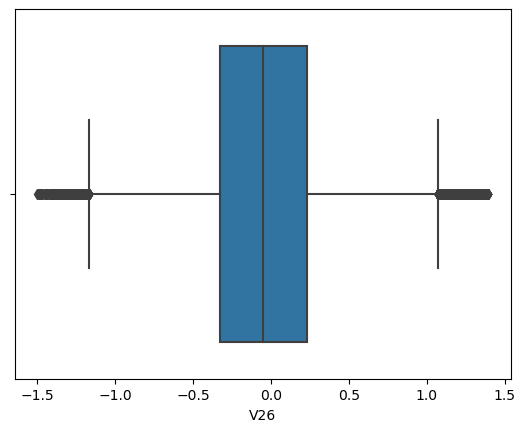

In [9]:
V1_median = df['V26'].median()
# Define a threshold for outliers (for example, anything more than 3 standard deviations from the median)
outlier_threshold = 3 * df['V26'].std()
                                                                                                   #handling outliers 
# Replace outliers with the median
df['V26'] = df['V26'].apply(lambda x: V1_median if abs(x - V1_median) > outlier_threshold else x)

sns.boxplot(df['V26'])

C:\ProgramData\anaconda3\ram\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='V26', ylabel='Density'>

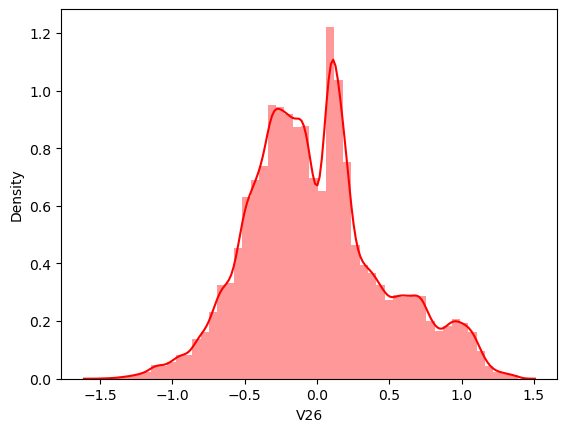

In [10]:
sns.distplot(df['V26'], kde = True, color = "r")

C:\ProgramData\anaconda3\ram\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='V27'>

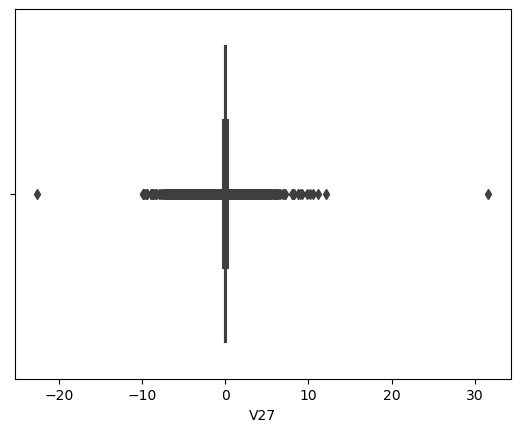

In [91]:
sns.boxplot(df['V27'])

In [92]:
def find_outliers(df, V27):
    q1 = df['V27'].quantile(0.25)
    q3 = df['V27'].quantile(0.75)
    iqr = q3 - q1
    lower_tail = q1 - 1.5 * iqr
    upper_tail = q3 + 1.5 * iqr
    outliers = df[(df['V27'] < lower_tail) | (df['V27'] > upper_tail)]
    return outliers

# Example usage:
outliers = find_outliers(df, "V27")
outliers

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
18,14.0,-5.401258,-5.450148,1.186305,1.736239,3.049106,-1.763406,-1.559738,0.160842,1.233090,...,-0.503600,0.984460,2.458589,0.042119,-0.481631,-0.621272,0.392053,0.949594,46.80,0
23,18.0,0.247491,0.277666,1.185471,-0.092603,-1.314394,-0.150116,-0.946365,-1.617935,1.544071,...,1.650180,0.200454,-0.185353,0.423073,0.820591,-0.227632,0.336634,0.250475,22.75,0
24,22.0,-1.946525,-0.044901,-0.405570,-1.013057,2.941968,2.955053,-0.063063,0.855546,0.049967,...,-0.579526,-0.799229,0.870300,0.983421,0.321201,0.149650,0.707519,0.014600,0.89,0
25,22.0,-2.074295,-0.121482,1.322021,0.410008,0.295198,-0.959537,0.543985,-0.104627,0.475664,...,-0.403639,-0.227404,0.742435,0.398535,0.249212,0.274404,0.359969,0.243232,26.43,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284786,172768.0,-2.076175,2.142238,-2.522704,-1.888063,1.982785,3.732950,-1.217430,-0.536644,0.272867,...,2.016666,-1.588269,0.588482,0.632444,-0.201064,0.199251,0.438657,0.172923,8.95,0
284789,172770.0,-0.446951,1.302212,-0.168583,0.981577,0.578957,-0.605641,1.253430,-1.042610,-0.417116,...,0.851800,0.305268,-0.148093,-0.038712,0.010209,-0.362666,0.503092,0.229921,60.50,0
284795,172778.0,-12.516732,10.187818,-8.476671,-2.510473,-4.586669,-1.394465,-3.632516,5.498583,4.893089,...,-0.944759,-1.565026,0.890675,-1.253276,1.786717,0.320763,2.090712,1.232864,9.87,0
284799,172783.0,-1.775135,-0.004235,1.189786,0.331096,1.196063,5.519980,-1.518185,2.080825,1.159498,...,0.103302,0.654850,-0.348929,0.745323,0.704545,-0.127579,0.454379,0.130308,79.99,0


C:\ProgramData\anaconda3\ram\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='V27'>

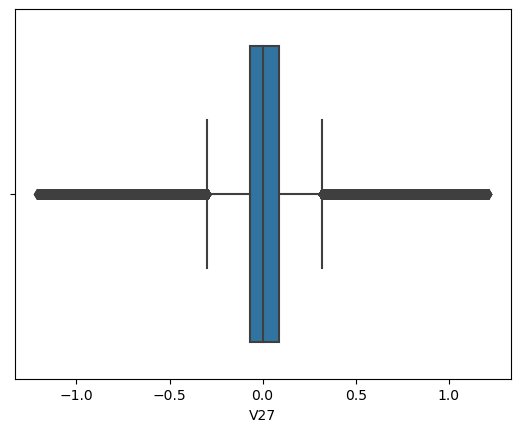

In [11]:
V1_median = df['V27'].median()
# Define a threshold for outliers (for example, anything more than 3 standard deviations from the median)
outlier_threshold = 3 * df['V27'].std()
                                                                                                   #handling outliers 
# Replace outliers with the median
df['V27'] = df['V27'].apply(lambda x: V1_median if abs(x - V1_median) > outlier_threshold else x)

sns.boxplot(df['V27'])

<AxesSubplot:xlabel='V27', ylabel='Density'>

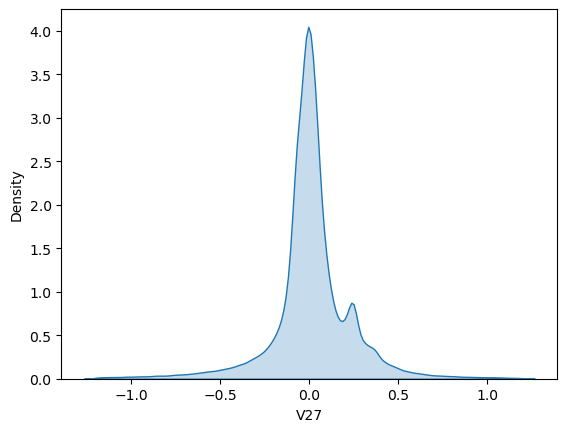

In [13]:
sns.kdeplot(df['V27'],fill = True)

C:\ProgramData\anaconda3\ram\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='V28'>

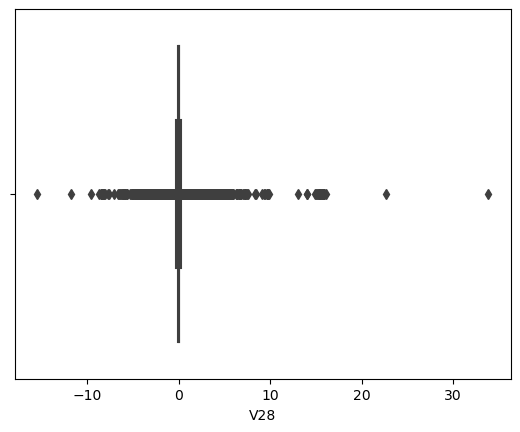

In [93]:
sns.boxplot(df['V28'])

In [94]:
def find_outliers(df, V28):
    q1 = df['V28'].quantile(0.25)
    q3 = df['V28'].quantile(0.75)
    iqr = q3 - q1
    lower_tail = q1 - 1.5 * iqr
    upper_tail = q3 + 1.5 * iqr
    outliers = df[(df['V28'] < lower_tail) | (df['V28'] > upper_tail)]
    return outliers

# Example usage:
outliers = find_outliers(df, "V28")
outliers

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
18,14.0,-5.401258,-5.450148,1.186305,1.736239,3.049106,-1.763406,-1.559738,0.160842,1.233090,...,-0.503600,0.984460,2.458589,0.042119,-0.481631,-0.621272,0.392053,0.949594,46.80,0
64,42.0,-0.522666,1.009923,0.276470,1.475289,-0.707013,0.355243,1.559849,-0.399579,-0.479813,...,0.172401,1.011543,0.069666,0.157820,-1.109224,-0.302369,0.318170,0.316910,243.66,0
66,44.0,-0.714764,0.514969,1.821676,0.616434,0.848776,-0.111938,1.505617,-0.798167,0.244757,...,-0.220075,-0.017845,-0.431938,-0.130458,0.337159,-0.440042,-0.674526,-0.473218,59.90,0
67,44.0,-0.948896,0.248414,2.956914,2.813750,0.145539,-0.027353,0.133702,-0.307535,-0.125244,...,-0.083647,0.416090,0.207537,0.716064,-0.602311,-0.064230,-0.315058,-0.272463,0.75,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284760,172749.0,-0.657393,1.038987,-1.498162,-1.889374,2.819520,3.333925,0.287569,0.958604,0.408711,...,-0.357330,-0.783553,0.138471,0.677221,-0.306279,0.175724,0.580689,0.281084,1.78,0
284769,172759.0,-1.570301,1.880590,-0.559004,-1.003017,-0.326096,-0.417224,-0.477372,1.122221,0.613186,...,-0.266727,-0.854690,-0.034251,-1.154617,0.036740,-0.233612,-0.427107,-0.255729,0.77,0
284772,172760.0,-6.713826,2.369104,-3.534768,-0.368259,-1.721030,-1.322808,-0.190876,0.891149,2.068476,...,0.131247,0.994246,-0.002140,-0.072979,-0.167159,-0.387271,-2.616341,0.474584,19.59,0
284795,172778.0,-12.516732,10.187818,-8.476671,-2.510473,-4.586669,-1.394465,-3.632516,5.498583,4.893089,...,-0.944759,-1.565026,0.890675,-1.253276,1.786717,0.320763,2.090712,1.232864,9.87,0


C:\ProgramData\anaconda3\ram\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='V28'>

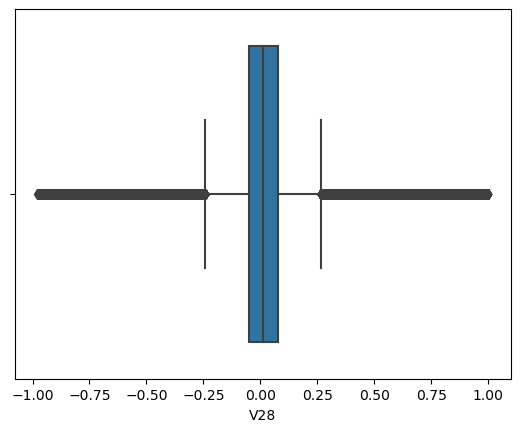

In [14]:
V1_median = df['V28'].median()
# Define a threshold for outliers (for example, anything more than 3 standard deviations from the median)
outlier_threshold = 3 * df['V28'].std()
                                                                                                   #handling outliers 
# Replace outliers with the median
df['V28'] = df['V28'].apply(lambda x: V1_median if abs(x - V1_median) > outlier_threshold else x)

sns.boxplot(df['V28'])

<AxesSubplot:xlabel='V28', ylabel='Count'>

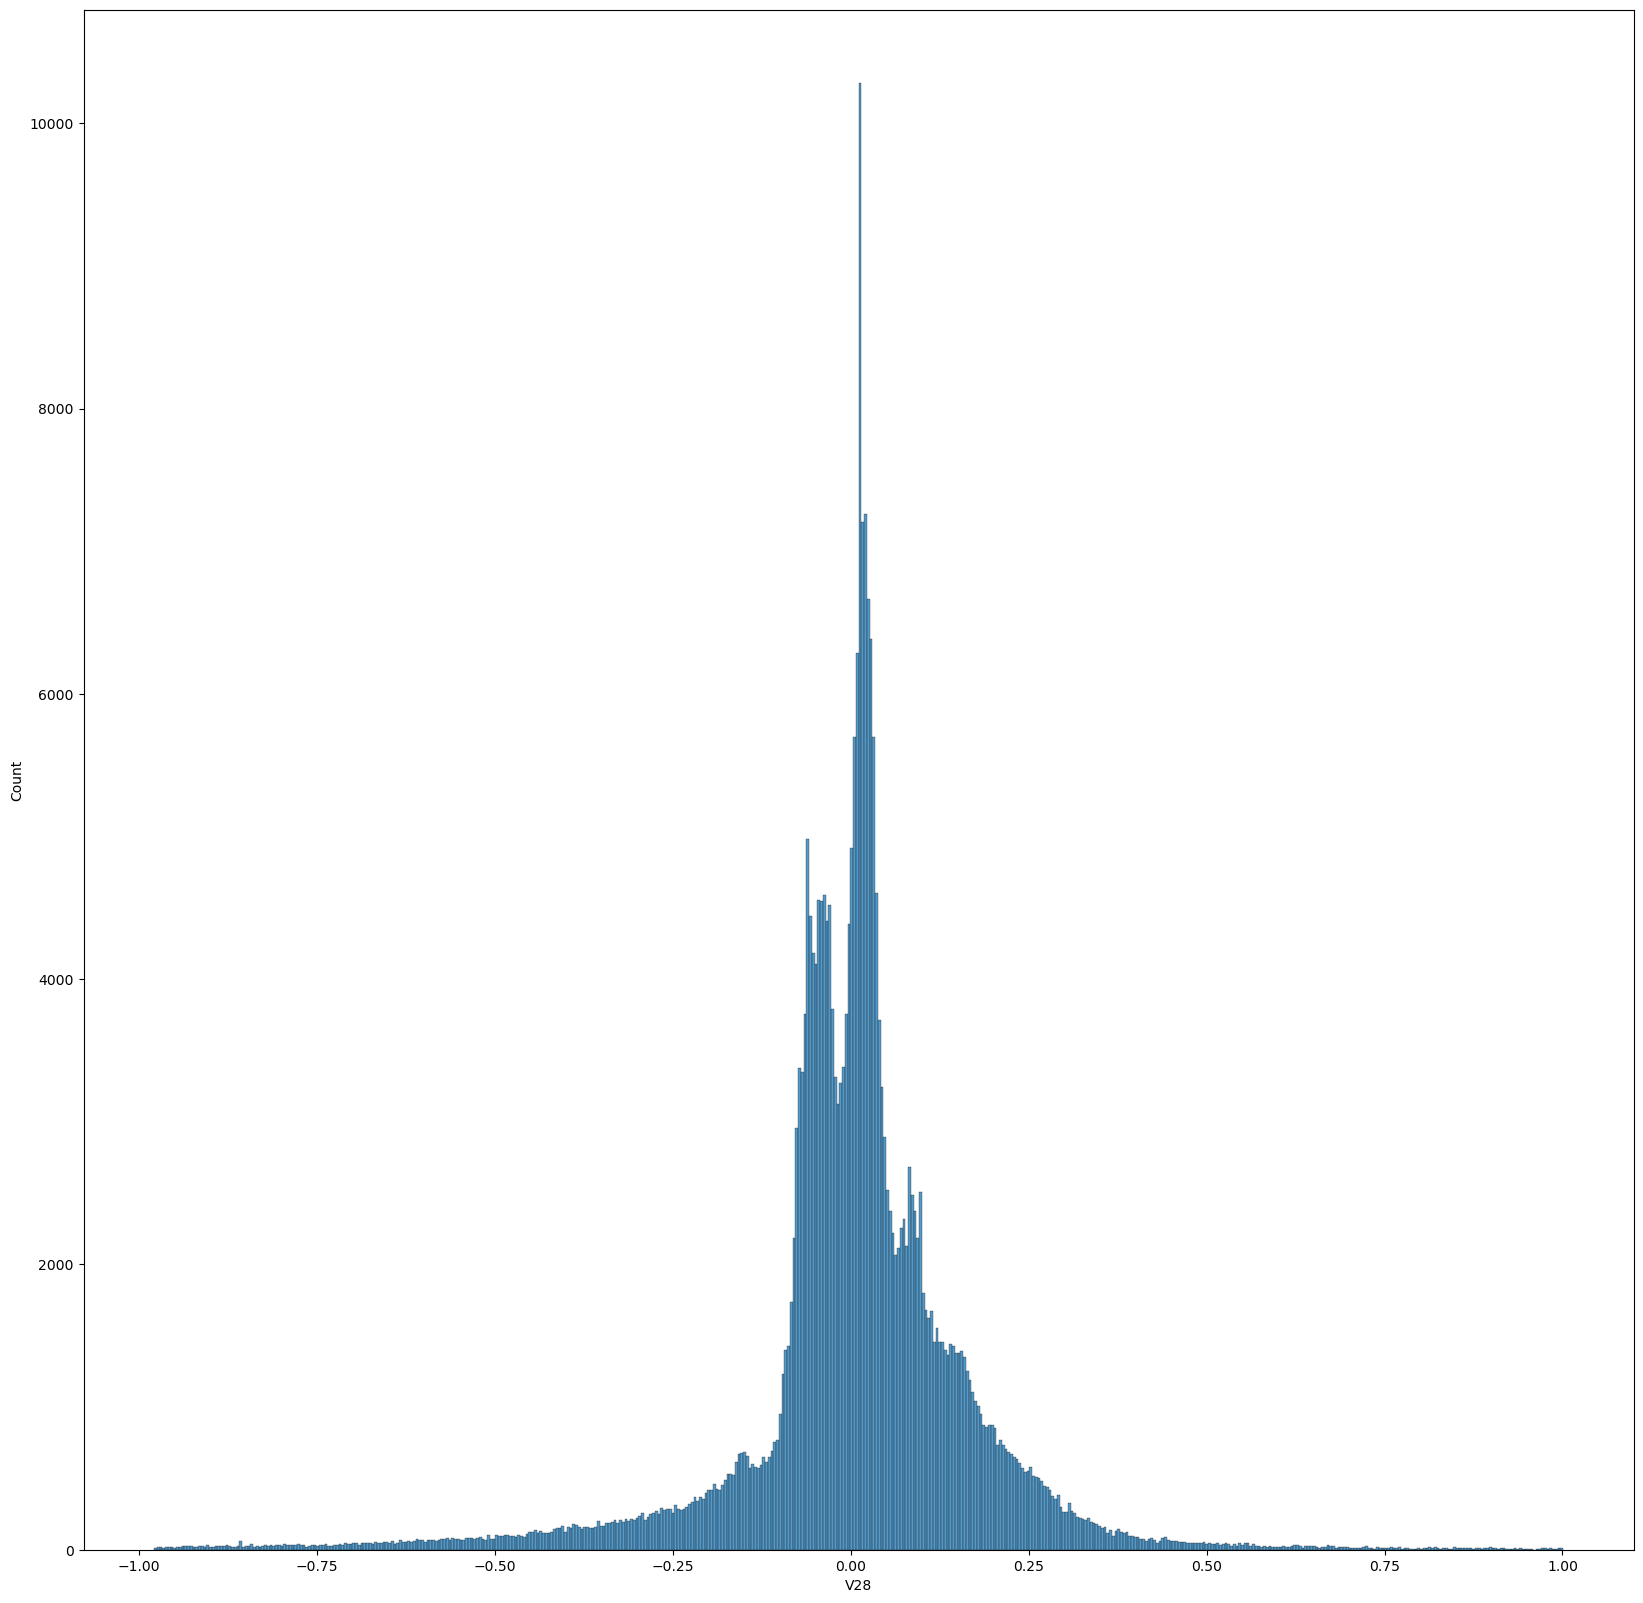

In [17]:
plt.figure(figsize=(20,20))
sns.histplot(df['V28'])

C:\ProgramData\anaconda3\ram\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Amount'>

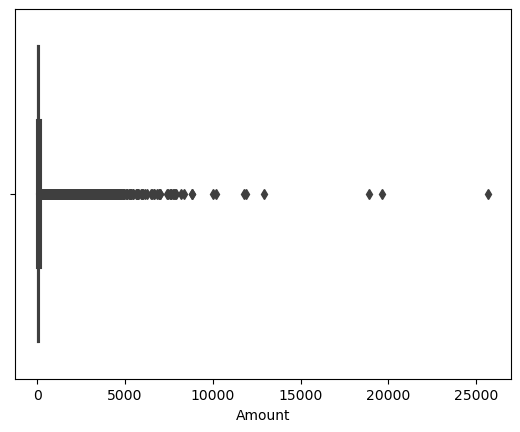

In [95]:
sns.boxplot(df['Amount'])

In [4]:
def find_outliers(df, Amount):
    q1 = df['Amount'].quantile(0.25)
    q3 = df['Amount'].quantile(0.75)
    iqr = q3 - q1
    lower_tail = q1 - 1.5 * iqr
    upper_tail = q3 + 1.5 * iqr
    outliers = df[(df['Amount'] < lower_tail) | (df['Amount'] > upper_tail)]
    return outliers

# Example usage:
outliers = find_outliers(df, "Amount")
outliers

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
20,16.0,0.694885,-1.361819,1.029221,0.834159,-1.191209,1.309109,-0.878586,0.445290,-0.446196,...,-0.295583,-0.571955,-0.050881,-0.304215,0.072001,-0.422234,0.086553,0.063499,231.71,0
51,36.0,-1.004929,-0.985978,-0.038039,3.710061,-6.631951,5.122103,4.371691,-2.006868,-0.278736,...,1.393406,-0.381671,0.969719,0.019445,0.570923,0.333278,0.857373,-0.075538,1402.95,0
64,42.0,-0.522666,1.009923,0.276470,1.475289,-0.707013,0.355243,1.559849,-0.399579,-0.479813,...,0.172401,1.011543,0.069666,0.157820,-1.109224,-0.302369,0.318170,0.316910,243.66,0
85,55.0,-4.575093,-4.429184,3.402585,0.903915,3.002224,-0.491078,-2.705393,0.666451,1.922216,...,-0.047365,0.853360,-0.971600,-0.114862,0.408300,-0.304576,0.547785,-0.456297,200.01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284735,172727.0,-1.661169,-0.565425,0.294268,-1.549156,-2.301359,2.365956,-0.248881,-0.857361,0.137784,...,1.432397,-0.257828,-0.072471,-1.035804,-0.437889,-0.238543,0.365302,-0.448621,381.05,0
284748,172738.0,1.634178,-0.486939,-1.975967,0.495364,0.263635,-0.713049,0.459925,-0.336879,0.743676,...,-0.113197,-0.493594,0.001993,0.602533,-0.049936,-0.145522,-0.040554,0.024884,220.28,0
284753,172743.0,1.465737,-0.618047,-2.851391,1.425282,0.893893,-0.958325,1.508074,-0.625691,-0.369824,...,0.500426,0.870491,-0.495410,0.676929,0.787688,-0.254918,-0.117200,-0.014737,337.54,0
284757,172745.0,-1.757643,-0.982659,1.091540,-1.409539,-0.662159,0.046930,0.173241,0.364812,1.143381,...,-0.191471,-0.432979,-0.292549,-0.281494,-0.484349,0.366751,-0.102628,-0.458915,200.00,0


C:\ProgramData\anaconda3\ram\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Amount'>

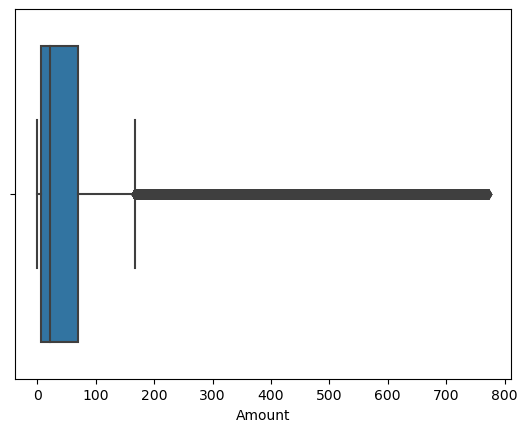

In [5]:
V1_median = df['Amount'].median()
# Define a threshold for outliers (for example, anything more than 3 standard deviations from the median)
outlier_threshold = 3 * df['Amount'].std()
                                                                                                   #handling outliers 
# Replace outliers with the median
df['Amount'] = df['Amount'].apply(lambda x: V1_median if abs(x - V1_median) > outlier_threshold else x)

sns.boxplot(df['Amount'])

<AxesSubplot:xlabel='Amount', ylabel='Density'>

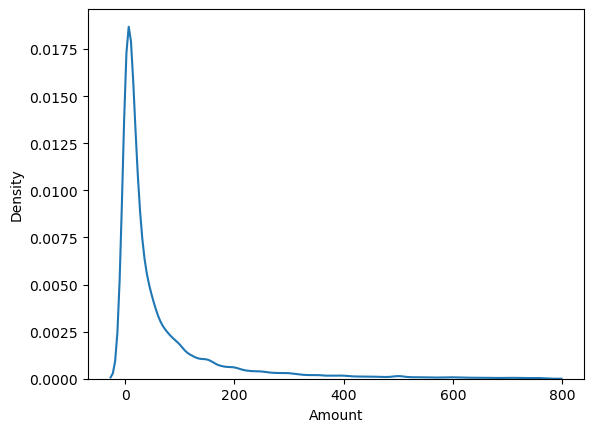

In [8]:
sns.kdeplot(df['Amount'])

In [97]:
df.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,...,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,...,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447
V5,0.173072,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,...,-3.920976e-16,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356,-0.094974
V6,-0.063016,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,...,5.833316e-17,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981,-0.043643
V7,0.084714,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,...,-2.027779e-16,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311,-0.187257
V8,-0.036949,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,...,3.892798e-16,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079,0.019875
V9,-0.008660,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,...,1.936953e-16,-7.071869e-16,-5.214137e-16,-1.430343e-16,6.757763e-16,-7.888853e-16,-6.709655e-17,1.110541e-15,-0.044246,-0.097733


<AxesSubplot:>

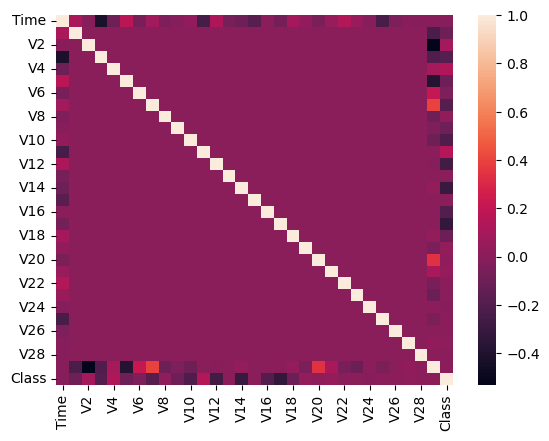

In [98]:
sns.heatmap(df.corr())

<AxesSubplot:>

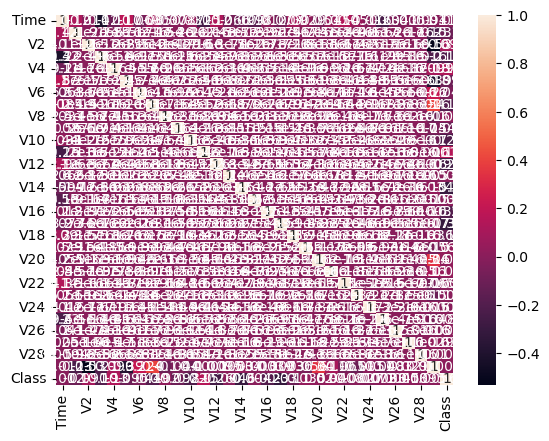

In [99]:
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:>

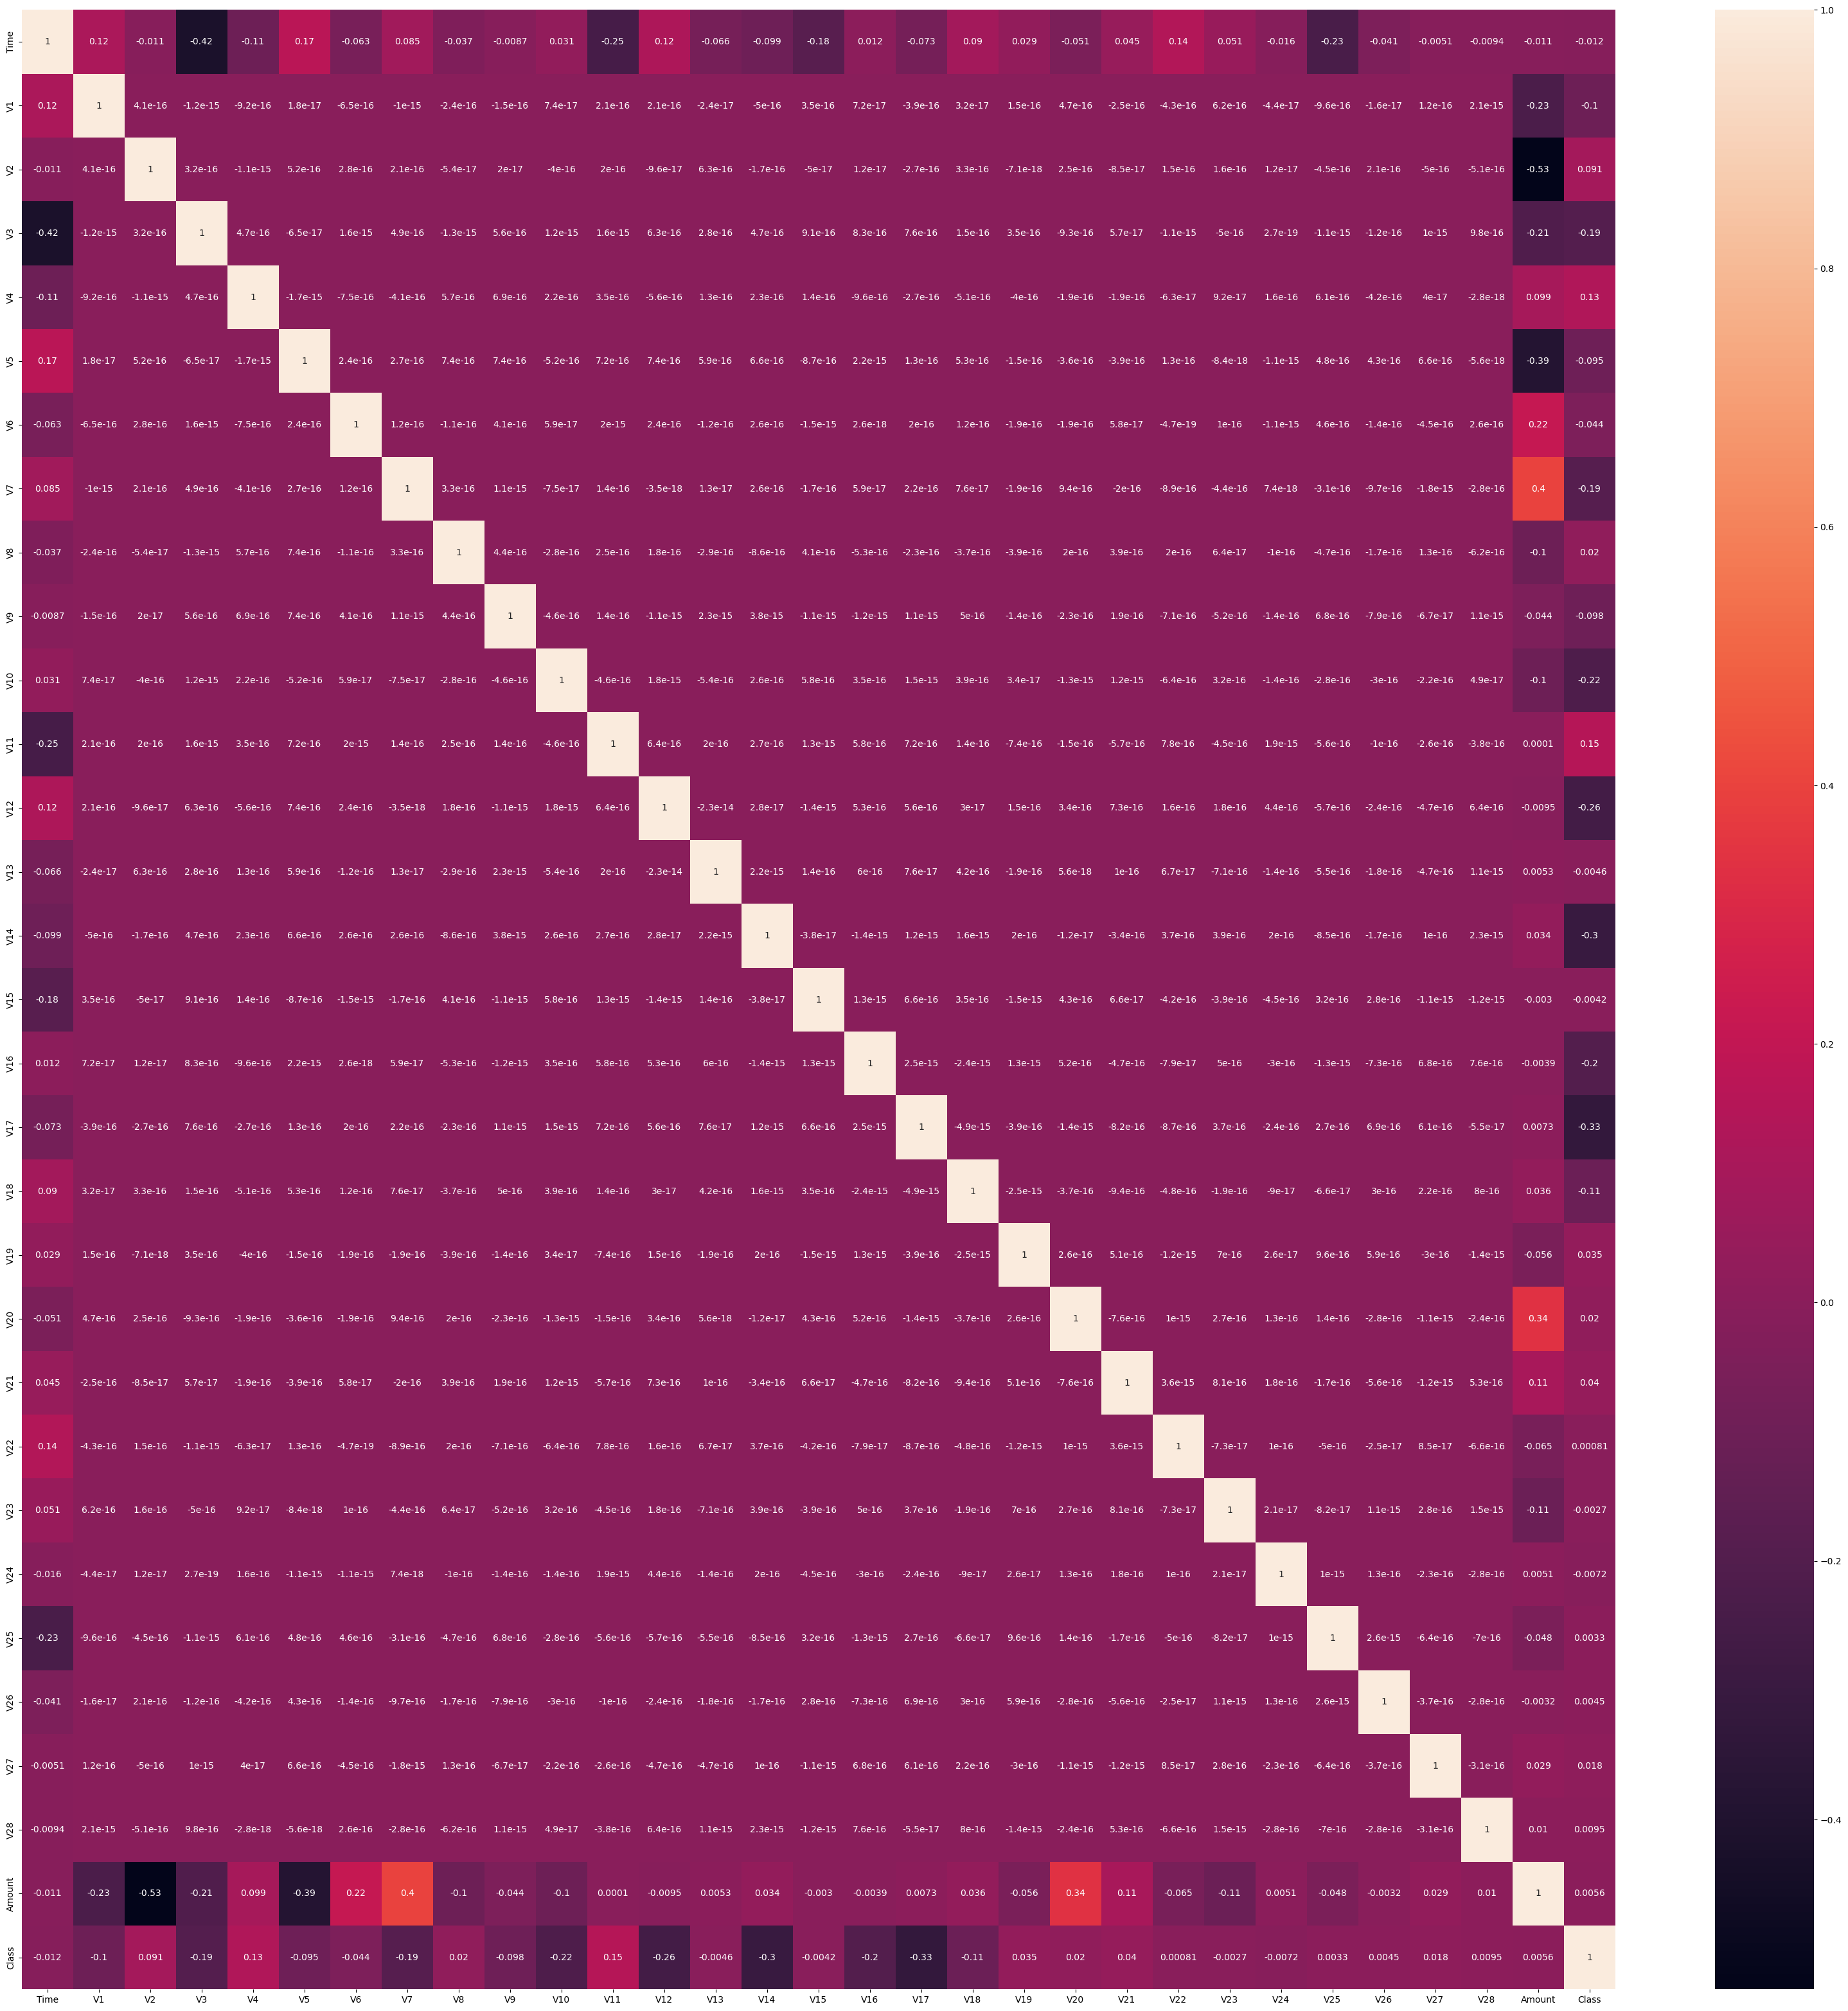

In [100]:
plt.figure(figsize=(40,40))
sns.heatmap(df.corr(), annot=True)

In [101]:
df.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,...,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,...,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447
V5,0.173072,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,...,-3.920976e-16,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356,-0.094974
V6,-0.063016,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,...,5.833316e-17,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981,-0.043643
V7,0.084714,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,...,-2.027779e-16,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311,-0.187257
V8,-0.036949,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,...,3.892798e-16,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079,0.019875
V9,-0.008660,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,...,1.936953e-16,-7.071869e-16,-5.214137e-16,-1.430343e-16,6.757763e-16,-7.888853e-16,-6.709655e-17,1.110541e-15,-0.044246,-0.097733


# Assumption - 1 NoMulticolinearity

In [16]:
df1 = df.iloc[:,:30]

In [17]:
df1

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [18]:
df1.shape

(284807, 30)

In [19]:
vif_df = pd.DataFrame()    #### create the new empty data frame
vif_df['Feature'] = df1.columns       ### create new column in vif_df like feature and assign the df1>columns name
vif_df    

,Feature
0,Time
1,V1
2,V2
3,V3
4,V4
5,V5
6,V6
7,V7
8,V8
9,V9


In [20]:
vif_list = []               ##### create the empty list 
for i in range(df1.shape[1]):            #####   set the loop iterate each columns index df1.shape[1] give the columns of df1
    vif = variance_inflation_factor(df1.to_numpy(),i)     ### calculate the vif and convert the numpyt arrays  and i assign the index of vif 
    vif_list.append(vif)

In [21]:
vif_df['VIF'] = vif_list          ##### create the new vif column and assign the vif list this column

In [22]:
vif_df

,Feature,VIF
0,Time,2.339084
1,V1,1.621694
2,V2,3.869377
3,V3,1.255585
4,V4,1.137944
5,V5,2.753075
6,V6,1.522122
7,V7,2.510165
8,V8,1.097151
9,V9,1.018831


# scaling

In [23]:
std = StandardScaler()
std_array = std.fit_transform(df1)

df2 = pd.DataFrame(std_array, columns = df1.columns)
df2.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.996583,-0.694242,-0.044075,1.672773,0.973366,-0.245117,0.347068,0.193679,0.082637,0.331128,...,0.326118,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330892,-0.063781,0.244964
1,-1.996583,0.608496,0.161176,0.109797,0.316523,0.043483,-0.061820,-0.063700,0.071253,-0.232494,...,-0.089611,-0.307377,-0.880077,0.162201,-0.561131,0.320694,0.261069,-0.022256,0.044608,-0.342475
2,-1.996562,-0.693500,-0.811578,1.169468,0.268231,-0.364572,1.351454,0.639776,0.207373,-1.378675,...,0.680975,0.337632,1.063358,1.456320,-1.138092,-0.628537,-0.288447,-0.137137,-0.181021,1.160686
3,-1.996562,-0.493325,-0.112169,1.182516,-0.609727,-0.007469,0.936150,0.192071,0.316018,-1.262503,...,-0.269855,-0.147443,0.007267,-0.304777,-1.941027,1.241904,-0.460217,0.155396,0.186189,0.140534
4,-1.996541,-0.591330,0.531541,1.021412,0.284655,-0.295015,0.071999,0.479302,-0.226510,0.744326,...,0.529939,-0.012839,1.100011,-0.220123,0.233250,-0.395202,1.041611,0.543620,0.651816,-0.073403


In [110]:
df["Class"].value_counts()     #### count the all values in species column

0    284315
1       492
Name: Class, dtype: int64

<AxesSubplot:xlabel='Class', ylabel='count'>

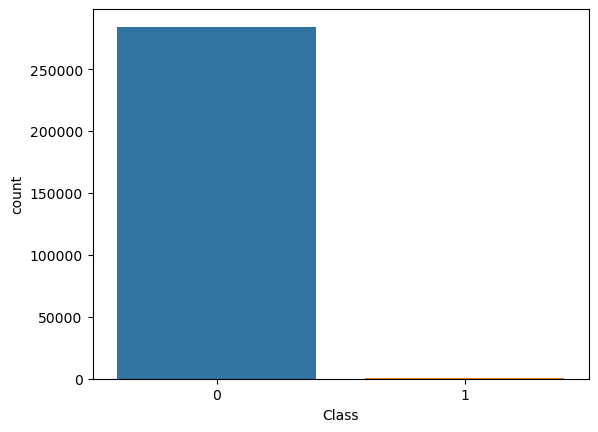

In [111]:
sns.countplot(x = df['Class'])             ###### visualized the species column 

In [112]:
df['Class'].unique()


array([0, 1], dtype=int64)

In [113]:
x = df2
y = df['Class']

In [114]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,stratify=y,random_state=11)

# step- 4 Model Training

In [115]:
log_reg = LogisticRegression() #for multiclass classification pass multi_class="ovr" 
log_reg

LogisticRegression()

In [116]:
log_reg_model = log_reg.fit(xtrain,ytrain)
log_reg_model

LogisticRegression()

In [117]:
ytrain


73488     0
73955     0
112057    0
47645     0
181308    0
         ..
248234    0
134458    0
130452    0
232580    0
64044     0
Name: Class, Length: 227845, dtype: int64

In [118]:
ytrain_predi = log_reg_model.predict(xtrain)
ytrain_predi

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

# step- 5 Model Evaluation

In [119]:
xtrain.shape

(227845, 30)

In [129]:
## for training data

acc = accuracy_score(ytrain,ytrain_predi)
print(f"Accuracy Score = {acc}")


conf_mat = confusion_matrix(ytrain,ytrain_predi)
print(f"Confusion Matrix : \n{conf_mat}")


clf_rpt = classification_report(ytrain,ytrain_predi)
print(f"Classification Report  :\n{clf_rpt}")

Accuracy Score = 0.9992099892470758
Confusion Matrix : 
[[227418     33]
 [   147    247]]
Classification Report  :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.88      0.63      0.73       394

    accuracy                           1.00    227845
   macro avg       0.94      0.81      0.87    227845
weighted avg       1.00      1.00      1.00    227845



In [121]:
### for testing 
ytest_predi = log_reg_model.predict(xtest)

In [130]:
##### for testing data

acc = accuracy_score(ytest,ytest_predi)
print(f"Accuracy Score = {acc}")


conf_mat = confusion_matrix(ytest,ytest_predi)
print(f"Confusion Matrix : \n{conf_mat}")


clf_rpt = classification_report(ytest,ytest_predi)
print(f"Classification Report  :\n{clf_rpt}")

Accuracy Score = 0.9991924440855307
Confusion Matrix : 
[[56854    10]
 [   36    62]]
Classification Report  :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.63      0.73        98

    accuracy                           1.00     56962
   macro avg       0.93      0.82      0.86     56962
weighted avg       1.00      1.00      1.00     56962



# step - 6 save model in pickle file 

In [123]:
import pickle

In [124]:
with open("log_reg_credi.pkl","wb") as f:
    pickle.dump(log_reg_model,f)

In [125]:
test_data = df2.head(1)
test_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.996583,-0.694242,-0.044075,1.672773,0.973366,-0.245117,0.347068,0.193679,0.082637,0.331128,...,0.326118,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.39217,0.330892,-0.063781,0.244964


In [126]:
with open("log_reg_credi.pkl","rb") as f:
    final_model = pickle.load(f)

final_model

LogisticRegression()

In [127]:
final_model.predict(test_data)[0]

0

In [133]:
if final_model.predict(test_data)[0] == 0:
    print("creditcard is  not froud   ")
else:
    print(" creaditcard is froud")


creditcard is  not froud   
